# 📞 **Telecom Customer Churn Intelligence Platform**  
**🔍 Advanced Analytics for Customer Retention Optimization**  
*📍 California | 👥 7,043 Customers | 📅 Q2 2023*

---

## 🎯 **Main Business Objective**  
To reduce customer churn and increase retention by identifying key factors influencing customer status—whether they **stay**, **churn**, or have just **joined**—and leveraging these insights to implement targeted, data-driven retention strategies.

---

## 📦 **Dataset Summary**  
| **Category**         | **Details**                                                                 |
|----------------------|------------------------------------------------------------------------------|
| **📊 Total Records** | 7,043 customer profiles                                                      |
| **🌍 Region**         | California, United States                                                   |
| **🗓️ Time Frame**    | April – June 2023 (Q2)                                                       |
| **🔗 Data Source**    | [Maven Analytics Data Playground](https://mavenanalytics.io/data-playground) |
| **🎯 Target Variable**| `Customer Status`: `Stayed`, `Churned`, `Joined`                            |

---

## 🧬 **Feature Categories**  

```python
features = {
    "👥 Demographics": ["Age", "Gender", "Partner", "Dependents"],
    "📶 Services": ["Phone Service", "Internet Service", "Streaming Services", "Add-ons"],
    "💳 Account Info": ["Tenure", "Contract Type", "Billing Method", "Payment Method"],
    "📊 Usage & Charges": ["Monthly Charges", "Total Charges", "Data Usage", "Call Minutes"]
}


In [295]:
# IMPORT NECESSARY LIBRARIES
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [296]:
# ======================================
# PANDAS & SEABORN CONFIGURATION
# ======================================

# ----- PANDAS DISPLAY SETTINGS -----
# Display all columns and rows without truncation
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 100)  # Limit rows to avoid excessive output
pd.set_option('display.width', 1000)    # Adjust display width for better readability
pd.set_option('display.colheader_justify', 'center')  # Center-align headers

# Floating-point precision (2 decimal places)
pd.options.display.float_format = '{:,.2f}'.format  # Adds thousand separators

# Improve performance with larger datasets
pd.set_option('compute.use_numexpr', True)  # Faster numerical operations
pd.set_option('mode.chained_assignment', 'warn')  # Warn on chained assignments

# ----- SEABORN & MATPLOTLIB STYLING -----
# Set a modern and clean style
sns.set_theme(
    style="whitegrid",  # Background grid for better readability
    context="notebook",  # Optimize for notebook display
    palette="deep",      # Aesthetic color palette
    font="sans-serif",   # Clean font
    font_scale=1.1,      # Slightly larger font size
    rc={
        'figure.figsize': (10, 6),  # Default figure size
        'axes.titlesize': 16,       # Title font size
        'axes.labelsize': 14,        # Axis label size
        'xtick.labelsize': 12,      # X-tick label size
        'ytick.labelsize': 12,       # Y-tick label size
        'grid.alpha': 0.3,          # Grid transparency
    }
)

# Improve matplotlib defaults
plt.rcParams['figure.dpi'] = 100      # Higher resolution for figures
plt.rcParams['savefig.dpi'] = 300     # High DPI for saved figures
plt.rcParams['lines.linewidth'] = 2   # Thicker plot lines
plt.rcParams['axes.edgecolor'] = '0.15'  # Softer axis edge color

# Disable scientific notation for small numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)   # Suppress scientific notation in NumPy

# Suppress unnecessary warnings (optional)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)  # Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)  # Ignore PerformanceWarnings

In [297]:
# Load the dataset with error handling
try:
    df = pd.read_csv(r'G:\Study\DATA SCINCE\PROJECTS\POTFOLIO\Telecom_Customer_Churn_Intelligence\telecom_customer_churn.csv')
    print("✅ Dataset loaded successfully!")
    print(f"Shape: {df.shape} (Rows: {df.shape[0]}, Columns: {df.shape[1]})")
    
    # Display first 3 rows 
    display(df.head(3))
    
    # Basic info
    print("\n📊 Data Overview:")
    display(df.info(verbose=True, show_counts=True))  # Shows non-null counts & dtypes
    
    # Check for duplicates
    print(f"\n🔍 Duplicates: {df.duplicated().sum()}")

    # Missing values summary
    print("\n❓ Missing Values:")
    missing = df.isna().sum().to_frame(name="Missing Values")
    missing["% Missing"] = (missing["Missing Values"] / len(df)) * 100
    display(missing.sort_values("% Missing", ascending=False))

except FileNotFoundError:
    print("❌ Error: File not found. Check the file path!")
except Exception as e:
    print(f"❌ Unexpected error: {e}")

✅ Dataset loaded successfully!
Shape: (7043, 38) (Rows: 7043, Columns: 38)


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.83,-119.00,2,9,NaN,Yes,42.39,No,Yes,Cable,16.00,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.16,-118.20,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.00,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.65,-117.92,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.00,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices



📊 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              316

None


🔍 Duplicates: 0

❓ Missing Values:


,Missing Values,% Missing
Churn Reason,5174,73.46
Churn Category,5174,73.46
Offer,3877,55.05
Online Backup,1526,21.67
Avg Monthly GB Download,1526,21.67
Online Security,1526,21.67
Streaming Movies,1526,21.67
Streaming TV,1526,21.67
Unlimited Data,1526,21.67
Streaming Music,1526,21.67


🧹 **DATA CLEANING NOTES: TELECOM CHURN DATASET**

### 1️⃣ Handling Missing Values

#### 🚫 Columns with >50% Missing:
- **Action:** Drop these columns entirely—they’re statistically unreliable.
- **Reason:** Imputing >50% missing data introduces heavy bias.

#### 🩹 Columns with <50% Missing:
- **Numerical Data:** Impute with median (robust to outliers) or mean (if normally distributed).
- **Categorical Data:** Replace with mode or a placeholder like "Unknown".

---
🔎 **Tip:** Use the missing values summary to identify which columns to drop or impute!


In [298]:
# Sample statistics for numerical columns
print("\n📈 Numerical Columns Summary:")
display(df.describe())



📈 Numerical Columns Summary:


,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,6361.00,5517.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,46.51,0.47,93486.07,36.20,-119.76,1.95,32.39,25.42,26.19,63.60,2280.38,1.96,6.86,749.10,3034.38
std,16.75,0.96,1856.77,2.47,2.15,3.00,24.54,14.20,19.59,31.20,2266.22,7.90,25.10,846.66,2865.20
min,19.00,0.00,90001.00,32.56,-124.30,0.00,1.00,1.01,2.00,-10.00,18.80,0.00,0.00,0.00,21.36
25%,32.00,0.00,92101.00,33.99,-121.79,0.00,9.00,13.05,13.00,30.40,400.15,0.00,0.00,70.55,605.61
50%,46.00,0.00,93518.00,36.21,-119.60,0.00,29.00,25.69,21.00,70.05,1394.55,0.00,0.00,401.44,2108.64
75%,60.00,0.00,95329.00,38.16,-117.97,3.00,55.00,37.68,30.00,89.75,3786.60,0.00,0.00,1191.10,4801.15
max,80.00,9.00,96150.00,41.96,-114.19,11.00,72.00,49.99,85.00,118.75,8684.80,49.79,150.00,3564.72,11979.34


In [299]:
print("\n📌 Categorical Columns:")
display(df.describe(include=['object', 'category']))


📌 Categorical Columns:


,Customer ID,Gender,Married,City,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Churn Category,Churn Reason
count,7043,7043,7043,7043,3166,7043,6361,7043,5517,5517,5517,5517,5517,5517,5517,5517,5517,7043,7043,7043,7043,1869,1869
unique,7043,2,2,1106,5,2,2,2,3,2,2,2,2,2,2,2,2,3,2,3,3,5,20
top,9995-HOTOH,Male,No,Los Angeles,Offer B,Yes,No,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed,Competitor,Competitor had better devices
freq,1,3555,3641,293,824,6361,3390,5517,3035,3498,3088,3095,3473,2810,2785,3029,4745,3610,4171,3909,4720,841,313


## DATA CLEANING & PRE-PROCESSING

### 1️⃣ Missing Values Overview

- Columns with **>50% missing** (e.g., `Offer`, `Churn Category`, `Churn Reason`) should be **dropped** due to unreliability.
- Columns with **<50% missing**:
    - **Numerical:** Impute using median or mean.
    - **Categorical:** Impute using mode or "Unknown".

### 2️⃣ Categorical Variables

- Categorical columns:  
    `Customer ID`, `Gender`, `Married`, `City`, `Offer`, `Phone Service`, `Multiple Lines`, `Internet Service`, `Internet Type`, `Online Security`, `Online Backup`, `Device Protection Plan`, `Premium Tech Support`, `Streaming TV`, `Streaming Movies`, `Streaming Music`, `Unlimited Data`, `Contract`, `Paperless Billing`, `Payment Method`, `Customer Status`, `Churn Category`, `Churn Reason`

### 3️⃣ Next Steps

- Drop columns with excessive missing data.
- Impute missing values in remaining columns.
- Encode categorical variables for modeling.

In [300]:
# 1. Drop high-missing columns
df = df.dropna(thresh=len(df)*0.5, axis=1)
df = df.drop(columns=['Customer ID','Zip Code'])

In [301]:
# 2. Impute remaining missing values
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Fill categorical columns with 'Unknown' and numerical with 0
df[cat_cols] = df[cat_cols].fillna('Unknown')
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].fillna(0)

In [302]:
# fill numerical columns with mean
df['Avg Monthly Long Distance Charges']= df['Avg Monthly Long Distance Charges'].fillna(df['Avg Monthly Long Distance Charges'].mean())


In [303]:
df_cleaned = df.copy()  # Create a cleaned copy of the DataFrame    

### Double-Checking `df_cleaned`

- Ensure there are **no missing values** in the cleaned DataFrame.
- All categorical columns (`cat_cols`) and numerical columns (`num_cols`) have been imputed or handled.
- Ready for further analysis and modeling!

In [304]:
# Get missing value counts
missing = df_cleaned.isna().sum()

# Filter to only show columns with missing values
missing = missing[missing > 0]

# Display with percentage of total
if not missing.empty:
    print("⚠️ Missing Values Found:")
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        '% of Total': (missing/len(df_cleaned))*100
    })
    display(missing_df.sort_values('% of Total', ascending=False))
else:
    print("✅ No missing values found in the cleaned DataFrame!")

✅ No missing values found in the cleaned DataFrame!


## 📊 Exploratory Data Analysis (EDA)

The goal of EDA is to understand the dataset, uncover patterns, spot anomalies, and generate hypotheses for further analysis.

### ✨ Key Steps in EDA


1. **Univariate Analysis**
    - Examine distributions of numerical features (e.g., Age, Monthly Charge).
    - Analyze categorical variables (e.g., Gender, Contract, Payment Method).

2. **Bivariate & Multivariate Analysis**
    - Explore relationships between features (e.g., Monthly Charge vs. Churn Reason).
    - Visualize correlations and group comparisons.

3. **Churn Analysis**
    - Investigate churn patterns by different customer segments.
    - Identify key drivers of churn.

4. **Visualization**
    - Use histograms, boxplots, bar charts, and heatmaps for insights.

---

🔎 **Let’s dive into the data to reveal actionable insights!**

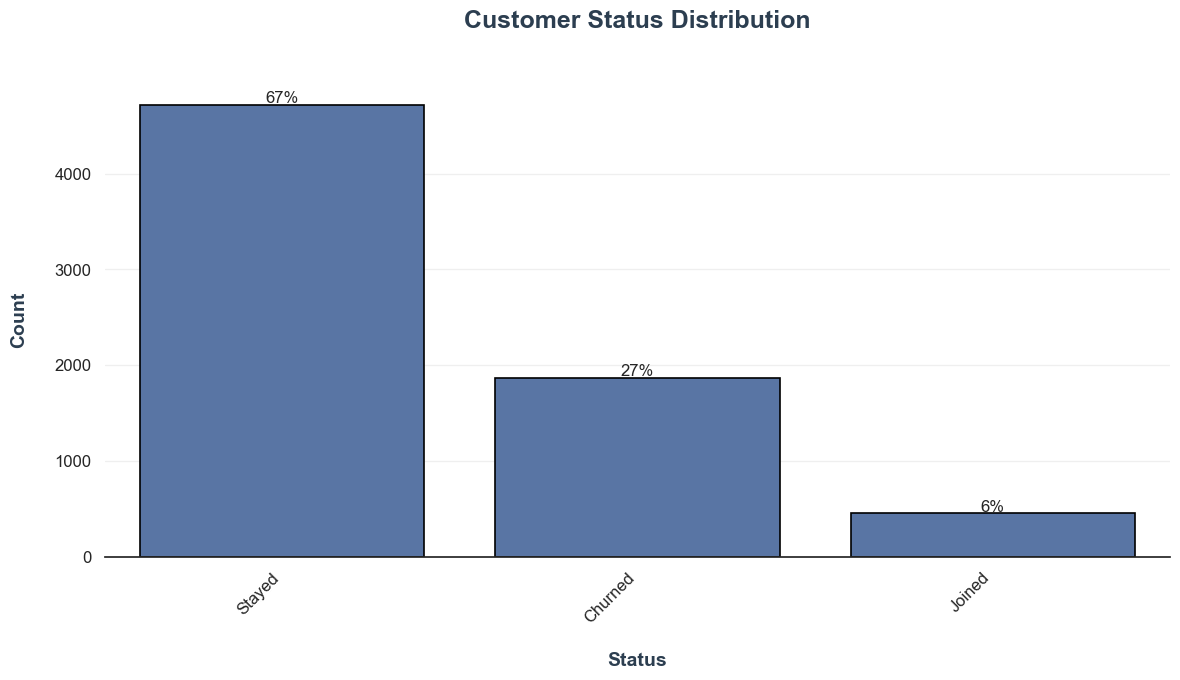

In [305]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, 
                 x='Customer Status',
                 order=df['Customer Status'].value_counts().index,            
                 edgecolor='black',  # Add borders to bars
                 linewidth=1.2)  # Border thickness

# Styling enhancements
sns.despine(left=True)  # Remove top and right spines
plt.grid(axis='y', alpha=0.3)  # Add subtle grid lines

# Title and labels with improved styling
plt.title('Customer Status Distribution\n', 
          fontsize=18, pad=20, fontweight='bold', color='#2c3e50')
plt.xlabel('\nStatus', fontsize=14, color='#2c3e50', fontweight='bold')
plt.ylabel('Count\n', fontsize=14, color='#2c3e50', fontweight='bold')


# Add percentage labels on top of each bar
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,  # x-position: center of bar
            height + 20,  # y-position: slightly above bar
            f'{height/total:.0%}',  # percentage without decimal
            ha='center',  # horizontal alignment
            fontsize=12)

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()



plt.show()

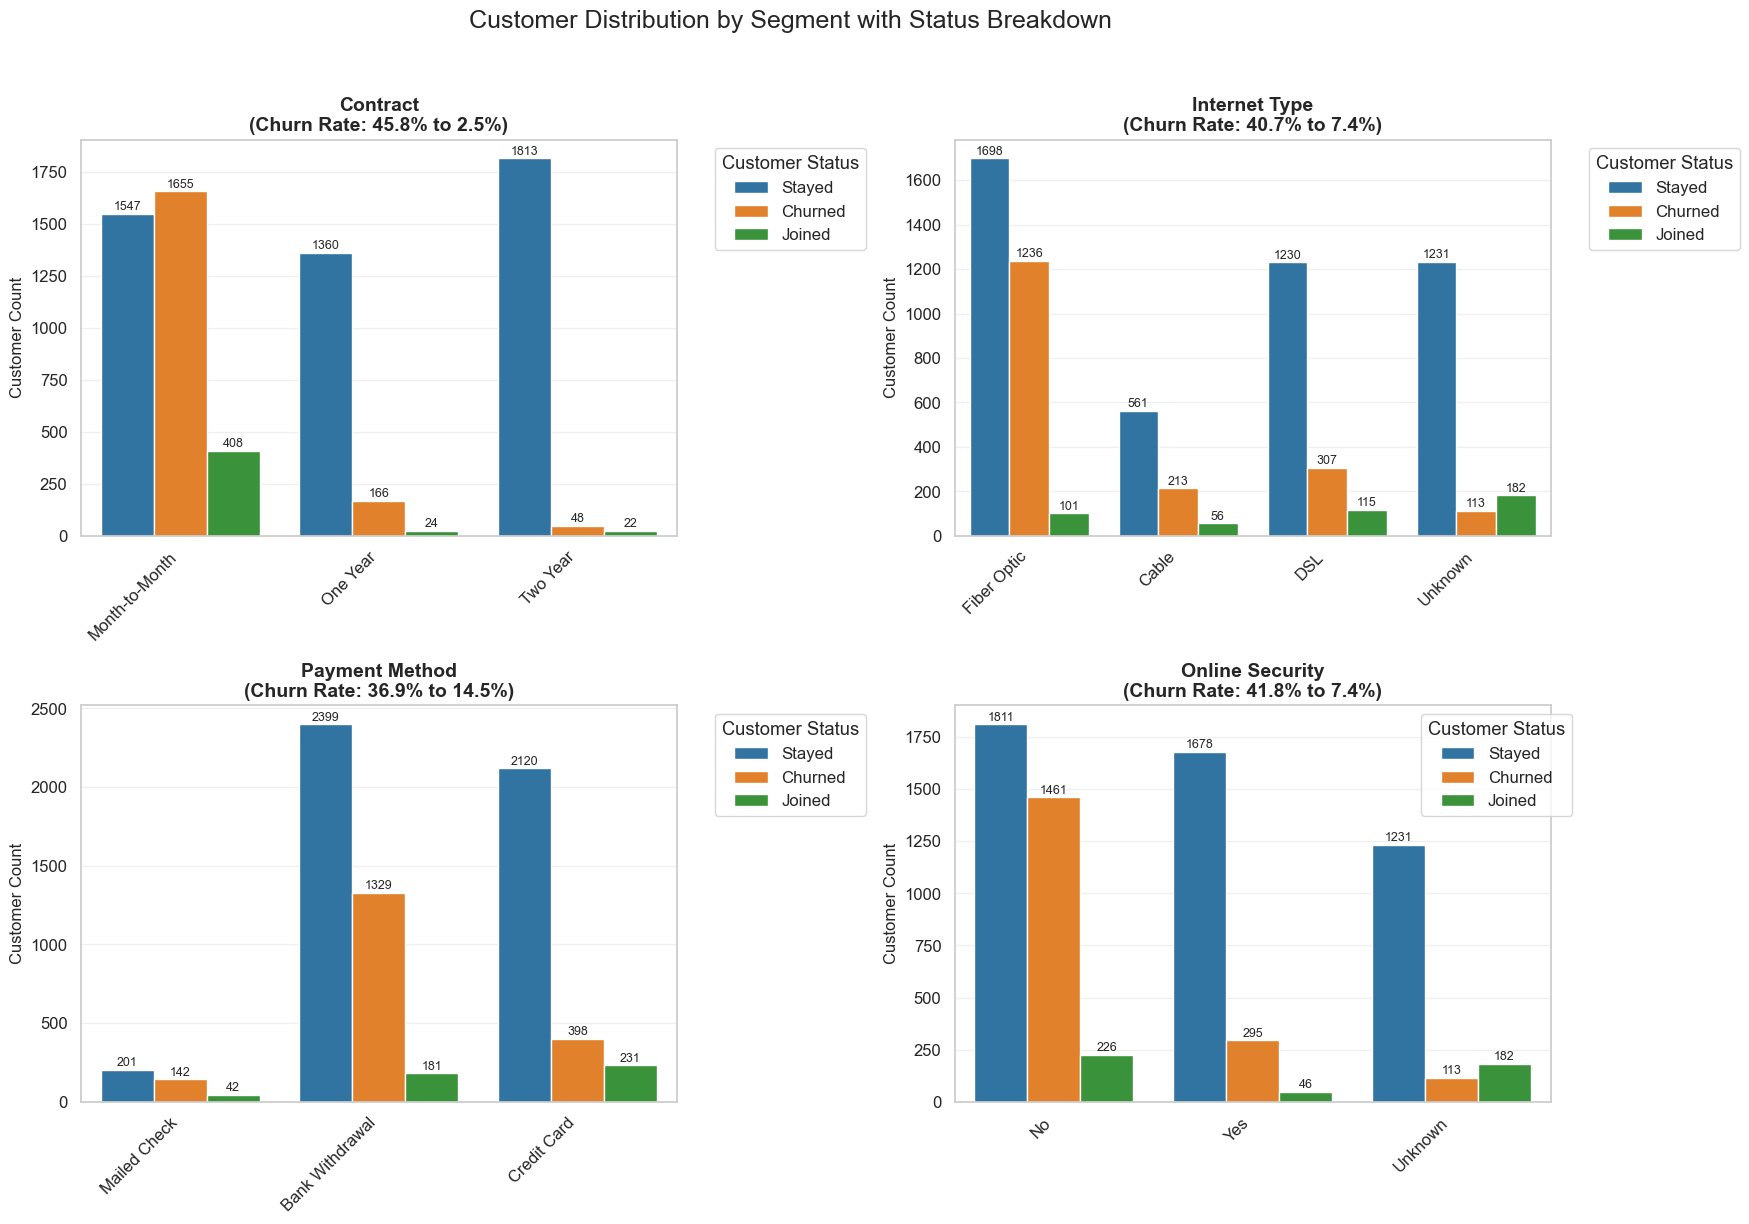

In [306]:
# Select segments - prioritize business-critical factors
segment_names = ['Contract', 'Internet Type', 'Payment Method', 'Online Security']

# Set figure size and style
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")
plt.suptitle("Customer Distribution by Segment with Status Breakdown", y=1.02, fontsize=18)

# Define a complete color palette for all possible statuses
status_palette = {
    'Stayed': '#1f77b4',    # Blue
    'Churned': '#ff7f0e',   # Orange
    'Joined': '#2ca02c',    # Green
    'Dormant': '#d62728'    # Red (example for other potential statuses)
}

for i, col in enumerate(segment_names):
    plt.subplot(2, 2, i+1)
    
    # Get all existing statuses in the data
    existing_statuses = [s for s in status_palette.keys() if s in df['Customer Status'].unique()]
    
    # Create ordered plot by churn percentage
    temp_df = df.groupby([col, 'Customer Status']).size().unstack().fillna(0)
    
    # Calculate churn rate only for relevant groups
    if 'Churned' in temp_df.columns:
        temp_df['Total'] = temp_df.sum(axis=1)
        temp_df['Churn Rate'] = temp_df['Churned'] / temp_df['Total']
        order = temp_df.sort_values('Churn Rate', ascending=False).index
    else:
        order = temp_df.sum(axis=1).sort_values(ascending=False).index
    
    ax = sns.countplot(
        data=df, 
        x=col, 
        hue='Customer Status',
        hue_order=existing_statuses,
        order=order,
        palette=status_palette
    )
    
    # Add count annotations
    for p in ax.patches:
        if p.get_height() > 0:  # Only annotate non-zero bars
            ax.annotate(
                f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 5), 
                textcoords='offset points', 
                fontsize=9
            )
    
    # Dynamic title with churn rate if available
    title = col
    if 'Churn Rate' in temp_df.columns:
        title += f"\n(Churn Rate: {temp_df['Churn Rate'].max():.1%} to {temp_df['Churn Rate'].min():.1%})"
    
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('Customer Count', fontsize=12)
    plt.legend(title='Customer Status', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

### 🔻 **Churn Rate**
**27%** of customers have **left** the service.

### 🆕 **New Customers**
**6%** have **recently joined** the service.

---

### 🚨 **High-Risk Segments**
- 📆 Customers with **month-to-month contracts**  
- 🌐 **Fiber optic** users  
- 🔐 Customers **without online security**

---

### 💡 **Business Insights & Recommendations**
To improve customer retention, consider:

- 📈 **Encouraging long-term contracts** (e.g., 12 or 24 months)  
- ⚙️ **Enhancing the fiber service experience** to reduce dissatisfaction  
- 🔒 **Promoting online security add-ons** for higher perceived value

---

> ✅ **Actionable focus**: Target high-risk segments with personalized offers and retention campaigns.

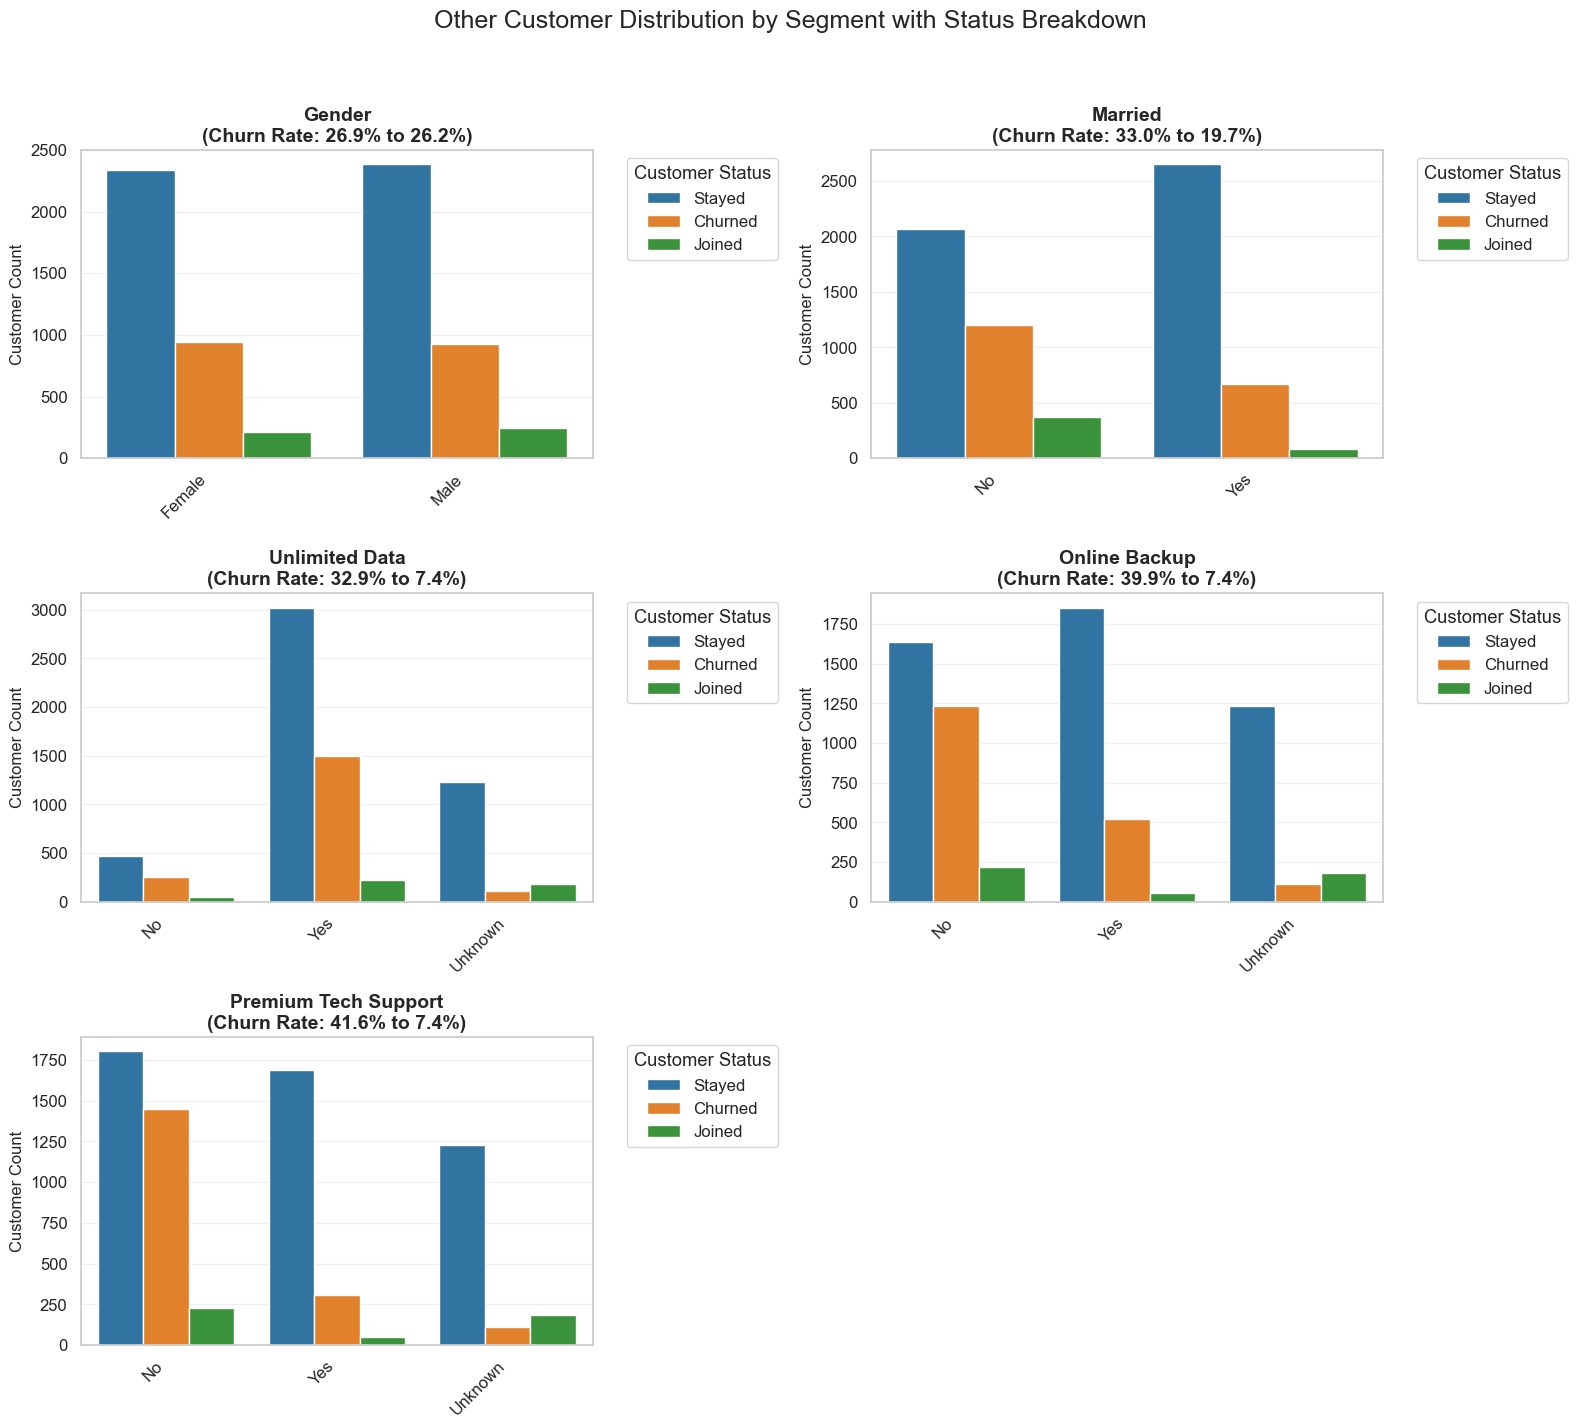

In [307]:

# Segments
segment_names = ['Gender', 'Married', 'Unlimited Data', 'Online Backup', 'Premium Tech Support']

# Set up
plt.figure(figsize=(16, 14))
sns.set_style("whitegrid")
plt.suptitle("Other Customer Distribution by Segment with Status Breakdown", y=1.02, fontsize=18)

# Define palette
status_palette = {
    'Stayed': '#1f77b4',
    'Churned': '#ff7f0e',
    'Joined': '#2ca02c',
    'Dormant': '#d62728'
}

for i, col in enumerate(segment_names):
    plt.subplot(3, 2, i+1)

    existing_statuses = [s for s in status_palette if s in df['Customer Status'].unique()]

    # Order bars by churn rate
    temp_df = df.groupby([col, 'Customer Status'], dropna=False).size().unstack().fillna(0)
    if 'Churned' in temp_df.columns:
        temp_df['Total'] = temp_df.sum(axis=1)
        temp_df['Churn Rate'] = temp_df['Churned'] / temp_df['Total']
        order = temp_df.sort_values('Churn Rate', ascending=False).index.tolist()
    else:
        order = temp_df.sum(axis=1).sort_values(ascending=False).index.tolist()

    # Plot
    ax = sns.countplot(
        data=df,
        x=col,
        hue='Customer Status',
        hue_order=existing_statuses,
        order=order,
        palette=status_palette
    )


    # Title
    title = col
    if 'Churn Rate' in temp_df.columns:
        title += f"\n(Churn Rate: {temp_df['Churn Rate'].max():.1%} to {temp_df['Churn Rate'].min():.1%})"
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('Customer Count', fontsize=12)
    plt.legend(title='Customer Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


## 🤔 Key Business Question

**Do higher-paying customers churn more?**


In [308]:
# Compare average monthly charges for churned vs. retained customers
df.groupby('Customer Status')['Monthly Charge'].mean()


Customer Status
Churned   73.35
Joined    42.78
Stayed    61.74
Name: Monthly Charge, dtype: float64

<Axes: xlabel='Customer Status', ylabel='Monthly Charge'>

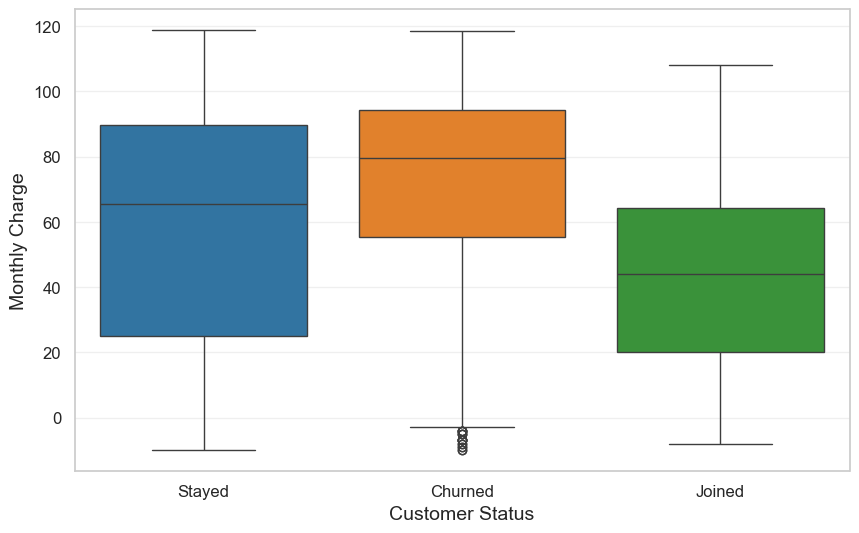

In [309]:
sns.boxplot(x='Customer Status', y='Monthly Charge', data=df, palette=status_palette)

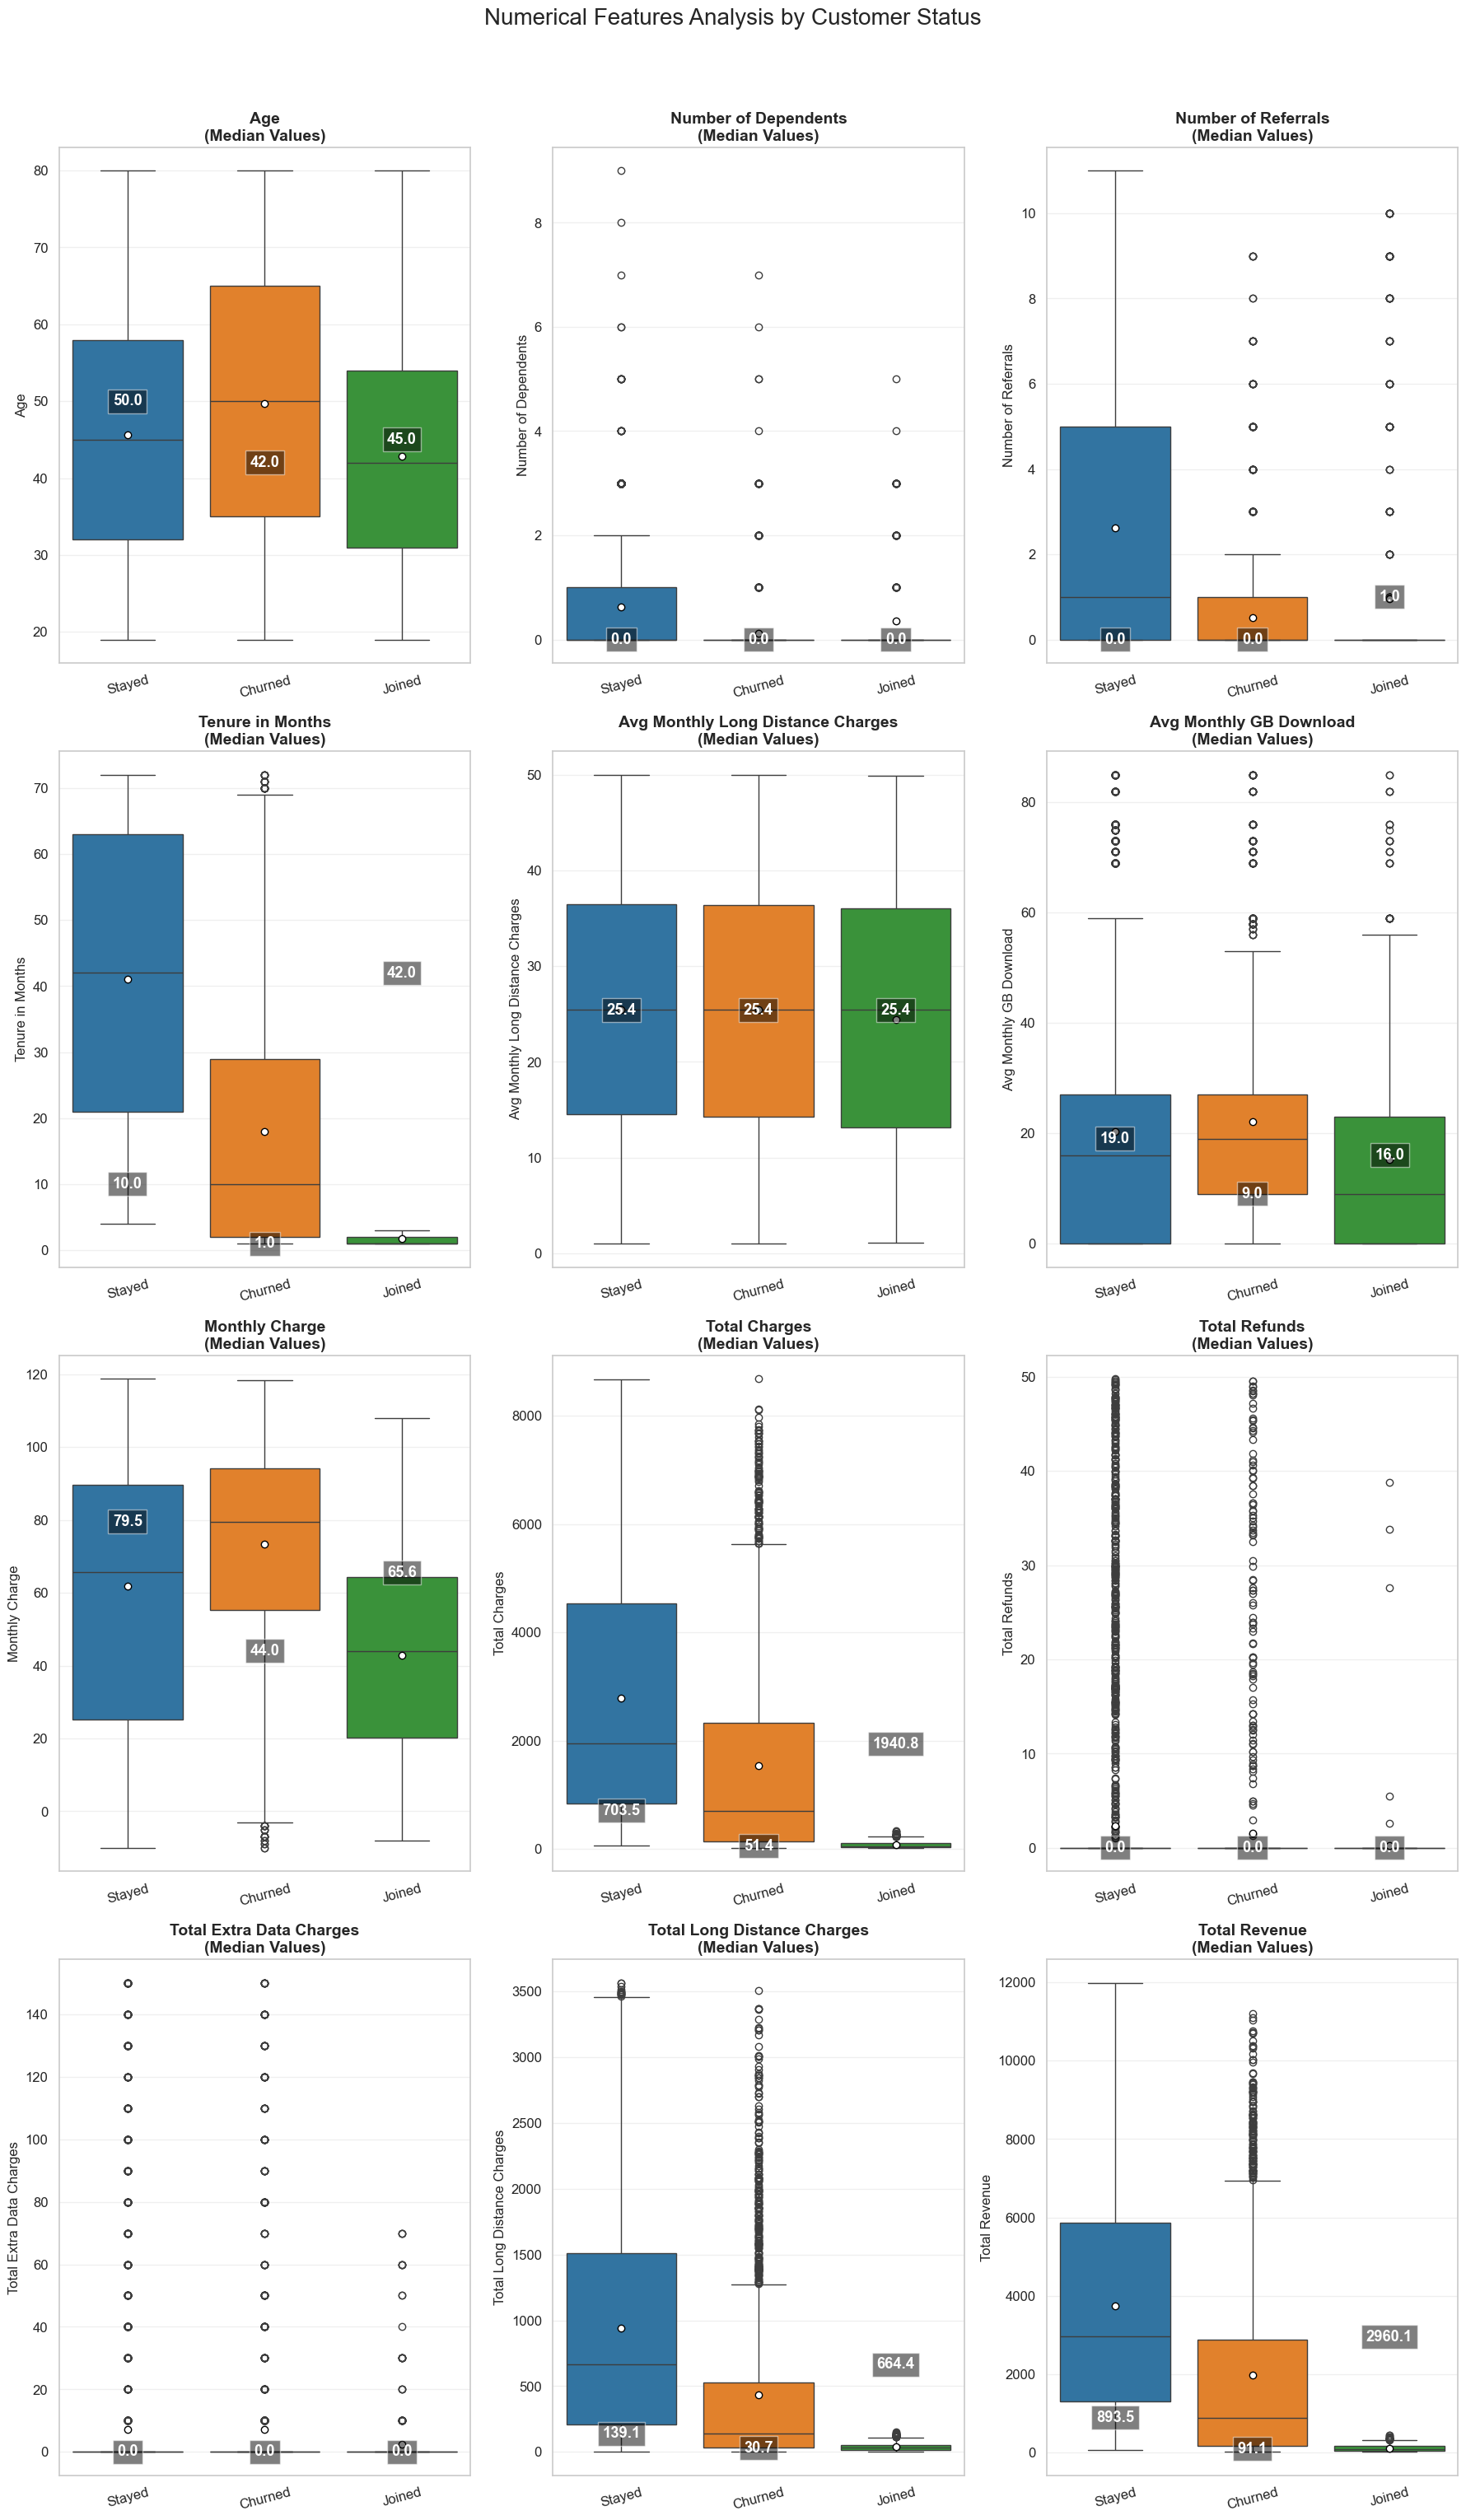

In [310]:
# Numerical features analysis
num = ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 
       'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue']

# Set up the visualization
plt.figure(figsize=(18, 30))
sns.set_style("whitegrid")
plt.suptitle("Numerical Features Analysis by Customer Status", y=1.02, fontsize=20)

# Create subplots - 4 columns x 3 rows
for i, col in enumerate(num):
    plt.subplot(4, 3, i+1)
    
    # Create boxplot with enhanced formatting
    ax = sns.boxplot(
        x='Customer Status', 
        y=col, 
        data=df, 
        palette=status_palette,
        showmeans=True,
        meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'}
    )
    
    # Add swarmplot for better data distribution visibility (for smaller datasets)
    if len(df) < 1000:
        sns.swarmplot(
            x='Customer Status', 
            y=col, 
            data=df, 
            color='.25',
            size=3,
            alpha=0.5
        )
    
    # Calculate and display median values
    medians = df.groupby('Customer Status')[col].median()
    for j, status in enumerate(medians.index):
        ax.text(j, medians[status], f'{medians[status]:.1f}', 
                ha='center', va='center', 
                fontweight='bold', color='white',
                bbox=dict(facecolor='black', alpha=0.5))
    
    plt.title(f"{col}\n(Median Values)", fontsize=14)
    plt.xlabel('')
    plt.ylabel(col, fontsize=12)
    plt.xticks(rotation=15)
    
    # Add statistical significance markers if desired
    # (Would require adding statistical tests here)

plt.tight_layout()
plt.show()

In [311]:
df.groupby('Customer Status')['Age'].mean()

Customer Status
Churned   49.74
Joined    42.87
Stayed    45.58
Name: Age, dtype: float64

## 🧠 Business Insight

Customers who **churn tend to pay more** than those who stay. This suggests that:

- 💸 **Higher-paying customers** may feel they’re **not receiving enough value** for what they spend.  
- 😟 There may be **service dissatisfaction**, **pricing concerns**, or **unmet expectations** among premium users.  
- 👵 Additionally, **older customers churn slightly more** than younger ones — possibly due to **usability issues**, **changing needs**, or **low engagement**.

---

### 👉 Action
Focus on **improving the experience and perceived value** for higher-paying customers — especially those on:

- 📆 **Month-to-month contracts**
- 🌐 **Fiber plans**

This can help **reduce churn** and **protect recurring revenue**.


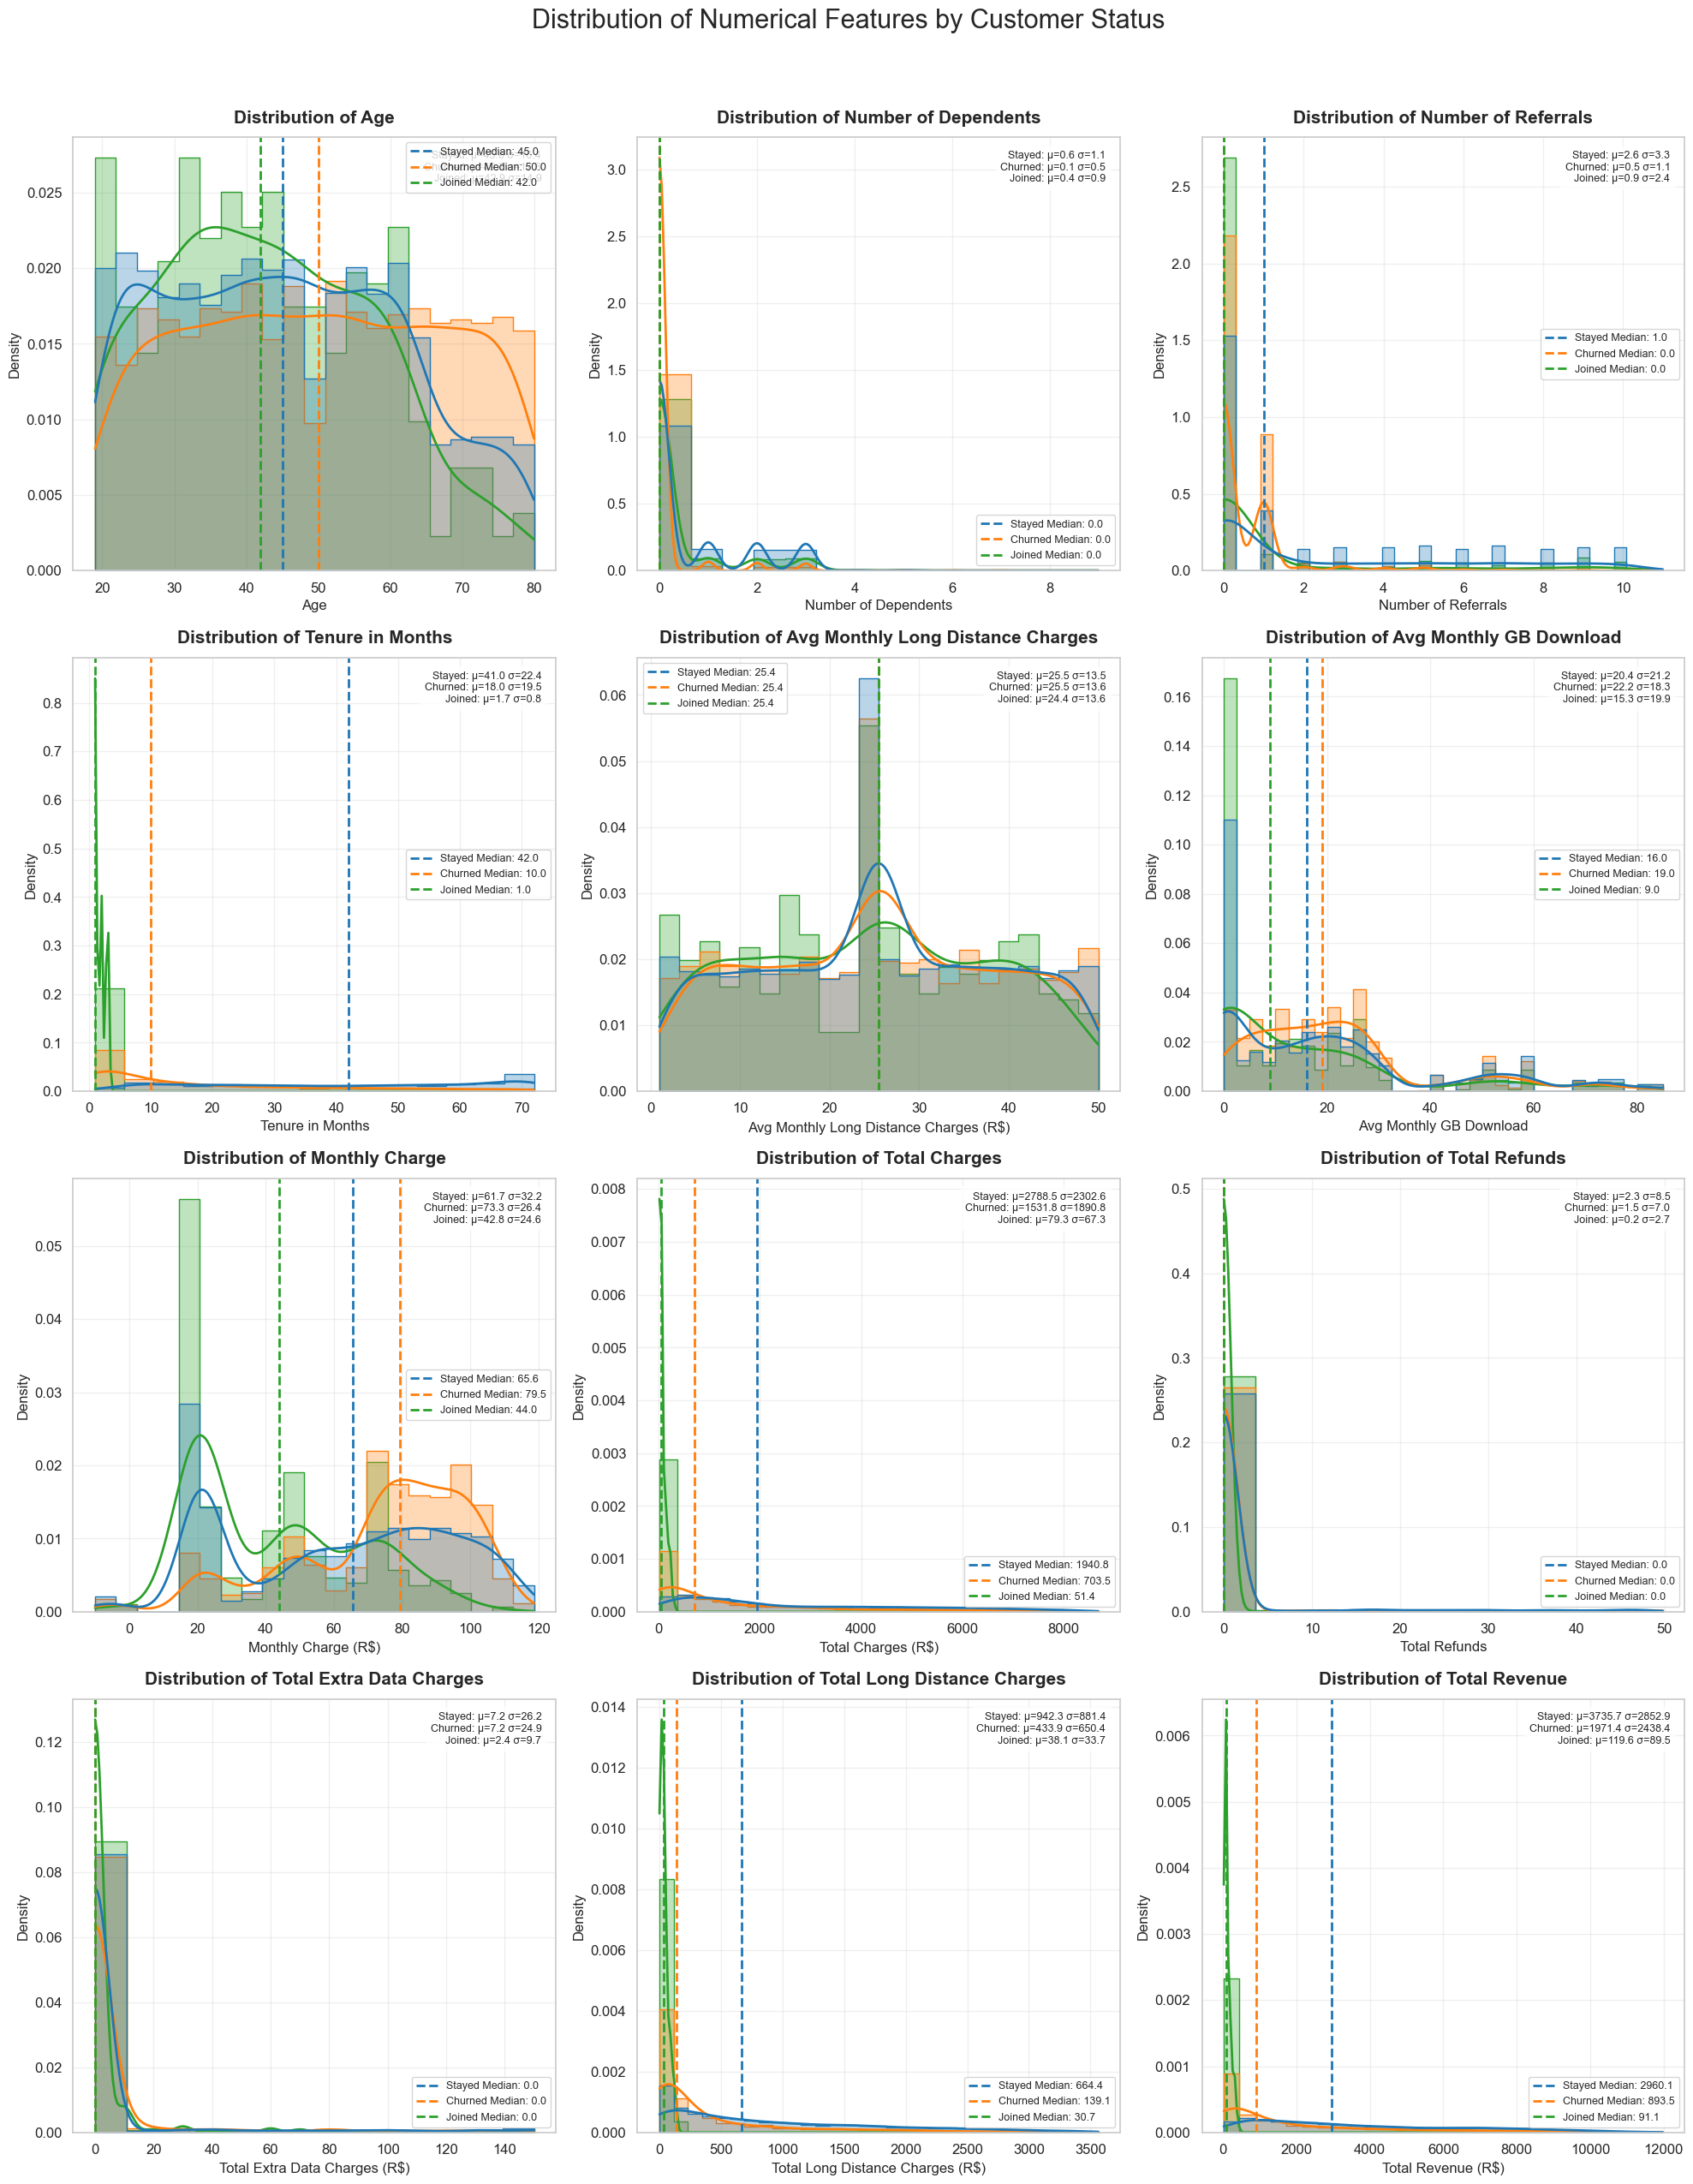

In [312]:
# Set up the visualization
plt.figure(figsize=(20, 25))
sns.set_style("whitegrid")
plt.suptitle("Distribution of Numerical Features by Customer Status", y=1.02, fontsize=22)

# Create subplots - 4 columns x 3 rows
for i, col in enumerate(num):
    plt.subplot(4, 3, i+1)
    
    # Create histogram with density curve
    ax = sns.histplot(
        data=df,
        x=col,
        hue='Customer Status',
        palette=status_palette,
        element='step',  # Clean stepped appearance
        stat='density',  # Show percentage/proportion
        common_norm=False,  # Normalize each group independently
        kde=True,  # Add kernel density estimate
        alpha=0.3  # Slight transparency
    )
    
    # Add median lines for each group
    for status, color in status_palette.items():
        if status in df['Customer Status'].unique():
            median_val = df[df['Customer Status']==status][col].median()
            plt.axvline(median_val, color=color, linestyle='--', linewidth=2, 
                        label=f'{status} Median: {median_val:.1f}')
    
    # Formatting
    plt.title(f"Distribution of {col}", fontsize=15, pad=12)
    plt.xlabel(col + (' (R$)' if 'Charge' in col or 'Revenue' in col else ''), fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=9)
    
    # Scientific notation prevention for large numbers
    if df[col].max() > 10000:
        plt.ticklabel_format(style='plain', axis='x')
    
    # Add box with key statistics
    stats_text = '\n'.join([f"{status}: μ={df[df['Customer Status']==status][col].mean():.1f}" +
                           f" σ={df[df['Customer Status']==status][col].std():.1f}"
                           for status in df['Customer Status'].unique()])
    plt.text(0.97, 0.97, stats_text, 
             transform=ax.transAxes,
             ha='right', va='top',
             bbox=dict(facecolor='white', alpha=0.8),
             fontsize=9)

plt.tight_layout()
plt.show()

In [313]:
# categorical_columns
cat_cols

Index(['Gender', 'Married', 'City', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status'], dtype='object')

In [314]:
categorical_features =['Gender', 'Married', 'Phone Service', 'Multiple Lines', 
                       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
                         'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 
                         'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status']

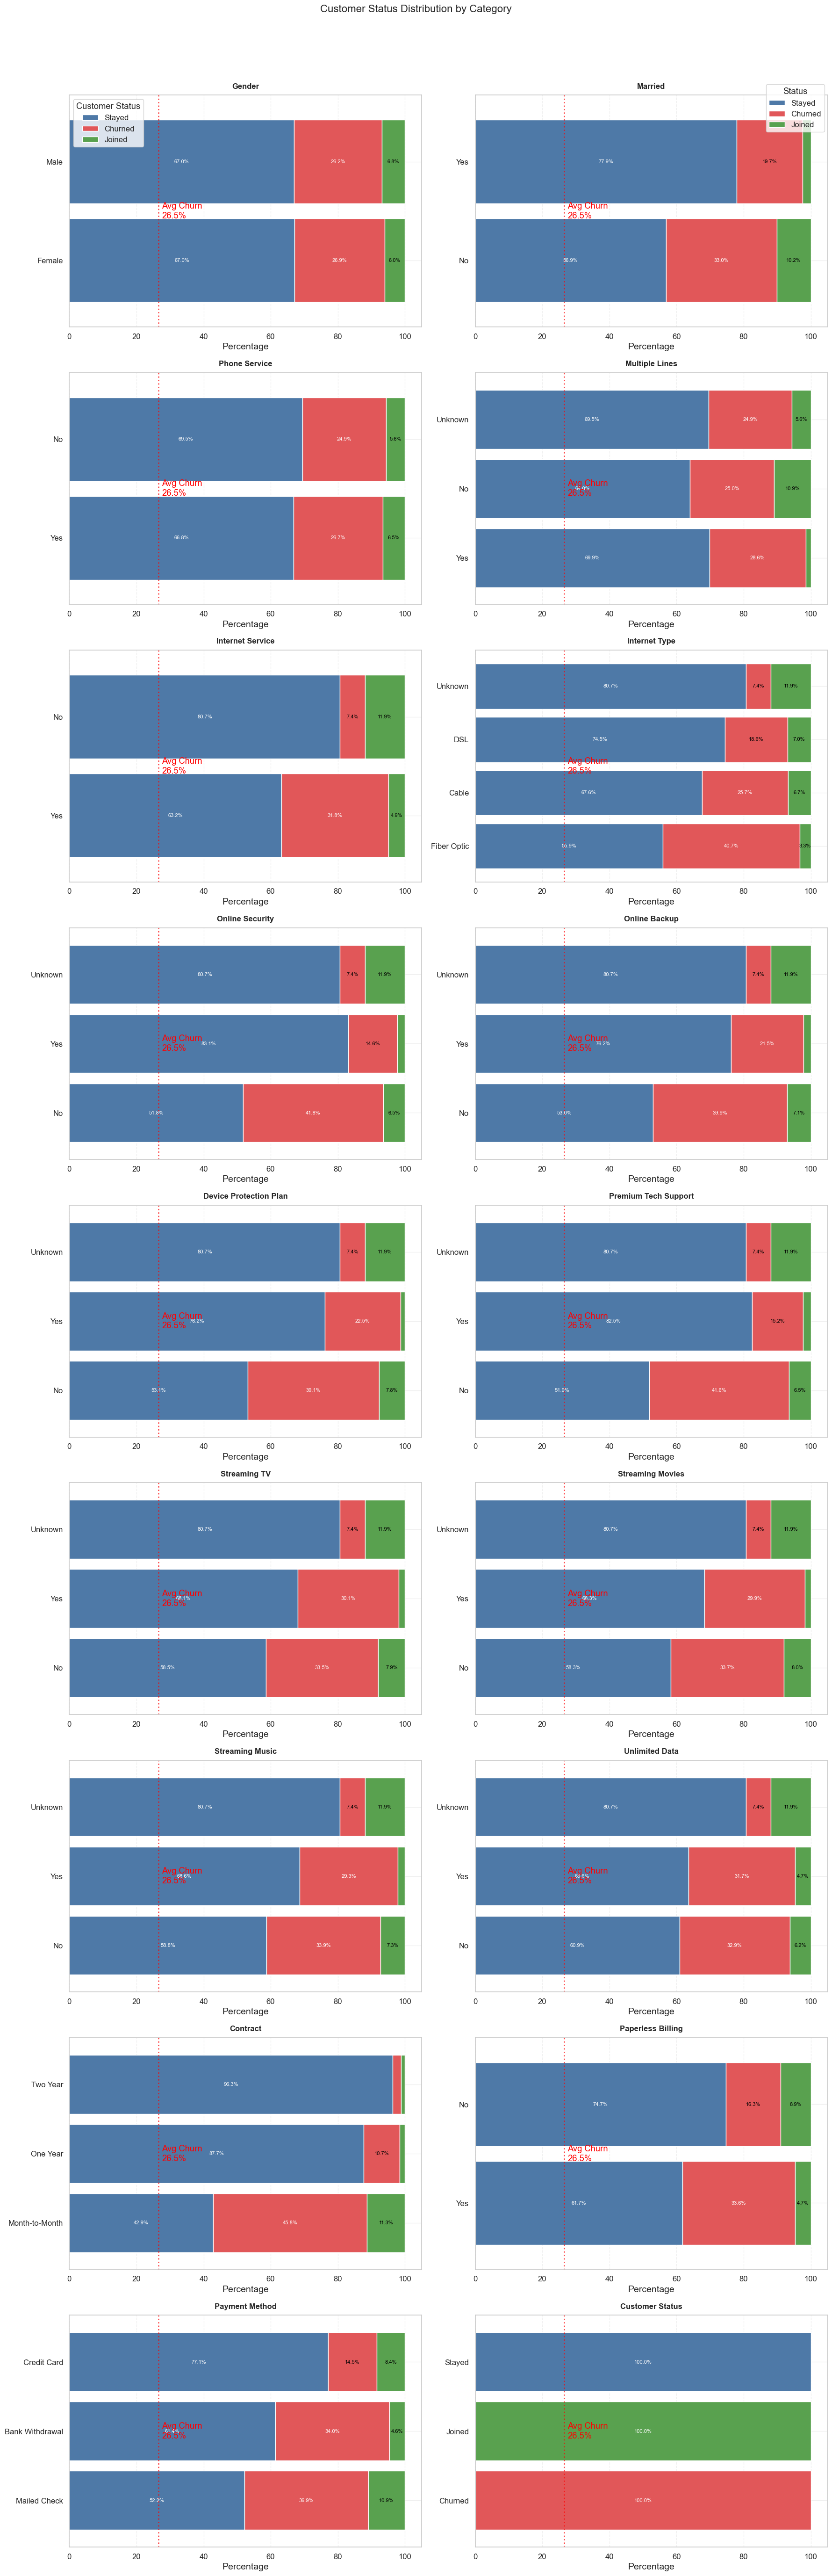

In [315]:
# Set up the style and figure
sns.set_style("whitegrid")
status_palette = {'Stayed': '#4e79a7', 'Churned': '#e15759', 'Joined': '#59a14f'}

# Calculate grid size
n_cols = 2  # Number of columns in subplot grid
n_rows = (len(categorical_features) // n_cols) + (1 if len(categorical_features) % n_cols else 0)  # Proper rounded up division

# Create figure with dynamic sizing
fig = plt.figure(figsize=(18, 6 * n_rows), dpi=100)  # Higher DPI for better quality
fig.suptitle('Customer Status Distribution by Category', y=1.02, fontsize=16)

for i, col in enumerate(categorical_features, 1):
    ax = plt.subplot(n_rows, n_cols, i)

    # Calculate and sort percentages
    churn_ratio = (pd.crosstab(df[col], df['Customer Status'], normalize='index') * 100)
    if 'Churned' in churn_ratio.columns:
        churn_ratio = churn_ratio.sort_values('Churned', ascending=False)
    
    # Plot with improved styling
    churn_ratio[['Stayed', 'Churned', 'Joined']].plot(
        kind='barh',  # Horizontal bars for better readability
        stacked=True,
        color=status_palette,
        width=0.85,
        ax=ax
    )

    # Add value annotations
    for p in ax.patches:
        width = p.get_width()
        if width > 3:  # Only label significant segments
            ax.text(p.get_x() + width / 2,
                    p.get_y() + p.get_height() / 2,
                    f'{width:.1f}%',
                    ha='center',
                    va='center',
                    color='white' if width > 20 else 'black',
                    fontsize=8)

    # Formatting
    ax.set_title(col, fontsize=12, pad=10)
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')
    ax.grid(True, axis='x', linestyle='--', alpha=0.3)

    # Add reference line for average churn
    avg_churn = df['Customer Status'].eq('Churned').mean() * 100
    ax.axvline(avg_churn, color='red', linestyle=':', alpha=0.7)
    ax.text(avg_churn + 1, 0.5, f'Avg Churn\n{avg_churn:.1f}%',
            transform=ax.get_xaxis_transform(),
            color='red', va='center')

    # Only show legend on first subplot
    if i != 1:
        ax.get_legend().remove()

# Adjust layout and add shared legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Status',
           loc='upper right', bbox_to_anchor=(0.99, 0.99),
           frameon=True)

plt.tight_layout()
plt.show()


## 📈 Advanced Churn Analysis by Tenure

### 🎯 **Objective**
- 📊 Quantify how **customer tenure** impacts **churn risk** using statistical testing (ANOVA, Tukey HSD)
- 🧩 Identify **critical tenure periods** with elevated churn via **segmentation** and **survival analysis**
- 📉 Visualize **tenure-churn relationships** to drive actionable **retention strategies**

---

### 🧪 **Key Outputs**
1. ✅ **Statistical significance** of tenure on churn (**p < 0.05** = critical factor)
2. 📊 **Churn rate by tenure group** with **confidence intervals**
3. 🕒 **Retention probability** over time using **Kaplan-Meier curve**
4. 🔥 **Cohort heatmap** highlighting temporal churn trends

---

### 📌 **Usage**
Prioritize **targeted interventions** for **high-risk tenure segments**  
➡️ Example: Customers within their **first 0–6 months** on the platform.

> 💡 This analysis guides **data-driven retention efforts** to reduce churn and boost long-term value.


ANOVA p-value: 0.0000
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj  lower    upper   reject
------------------------------------------------------
Churned Joined -16.2589   0.0 -18.8215 -13.6963   True
Churned Stayed  23.0624   0.0  21.7239  24.4009   True
 Joined Stayed  39.3213   0.0  36.9147  41.7279   True
------------------------------------------------------


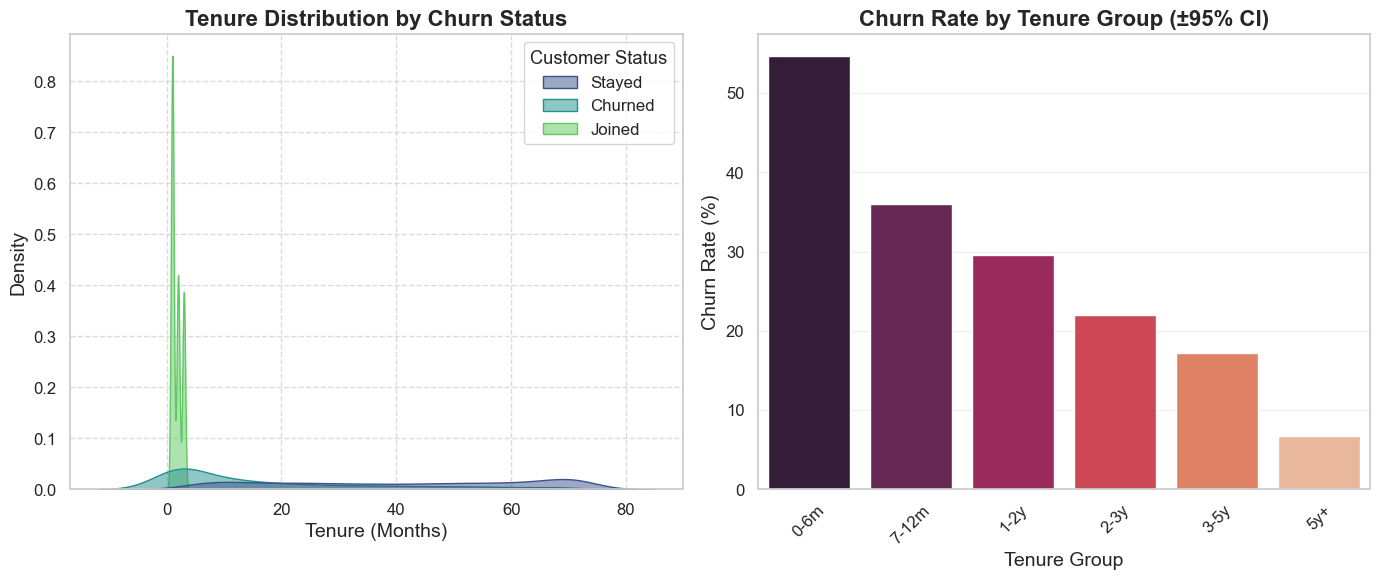

In [316]:

# --- Advanced Data Prep ---
# Create tenure groups with business logic
df['Tenure Group'] = pd.cut(
    df['Tenure in Months'],
    bins=[0, 6, 12, 24, 36, 60, np.inf],
    labels=['0-6m', '7-12m', '1-2y', '2-3y', '3-5y', '5y+'],
    right=False
)

# --- Statistical Analysis ---
# 1. ANOVA test to check if tenure affects churn
churned = df[df['Customer Status'] == 'Churned']['Tenure in Months']
stayed = df[df['Customer Status'] == 'Stayed']['Tenure in Months']
f_stat, p_val = stats.f_oneway(churned, stayed)
print(f"ANOVA p-value: {p_val:.4f}")  # If p < 0.05, tenure significantly affects churn

# 2. Tukey HSD for group-wise comparison (if ANOVA is significant)
if p_val < 0.05:
    tukey = pairwise_tukeyhsd(
        df['Tenure in Months'],
        df['Customer Status'],
        alpha=0.05
    )
    print(tukey.summary())

# --- Advanced Visualization ---
plt.figure(figsize=(14, 6))

# 1. KDE Plot for tenure distribution by churn status
plt.subplot(1, 2, 1)
sns.kdeplot(
    data=df, x='Tenure in Months', hue='Customer Status',
    fill=True, common_norm=False, alpha=0.5, palette='viridis'
)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.grid(True, linestyle='--', alpha=0.7)

# 2. Churn Rate by Tenure Group (with confidence intervals)
plt.subplot(1, 2, 2)
churn_rate = (
    df.groupby('Tenure Group')['Customer Status']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Churn Rate (%)')
    .reset_index()
)
sns.barplot(
    data=churn_rate[churn_rate['Customer Status'] == 'Churned'],
    x='Tenure Group', y='Churn Rate (%)',
    palette='rocket', ci=95  # 95% confidence intervals
)
plt.title('Churn Rate by Tenure Group (±95% CI)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()




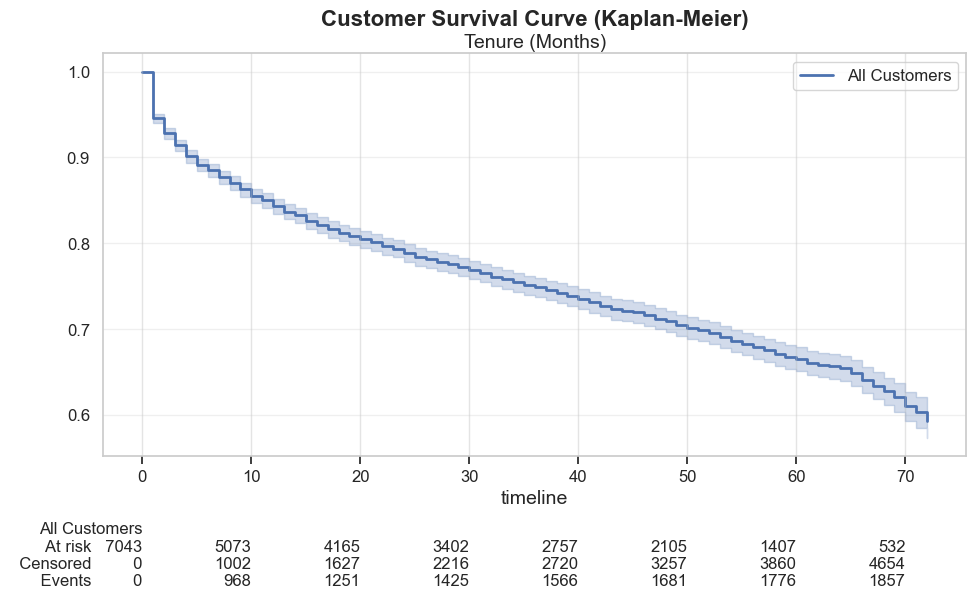

In [317]:
# --- Survival Analysis 
# Kaplan-Meier Estimator for customer retention
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
df['Churned'] = df['Customer Status'].apply(lambda x: 1 if x == 'Churned' else 0)
kmf.fit(df['Tenure in Months'], df['Churned'], label='All Customers')
kmf.plot_survival_function(at_risk_counts=True)
plt.title('Customer Survival Curve (Kaplan-Meier)')
plt.ylabel('Retention Probability')
plt.xlabel('Tenure (Months)')
plt.grid(True)
plt.show()

In [318]:
# Get survival probabilities at key milestones (months)
retention_points = [6, 12, 24, 36, 60]  # Customize as needed
survival_probabilities = kmf.predict(retention_points)

print("Retention Probability at Key Tenure Milestones:")
for months, prob in zip(retention_points, survival_probabilities):
    print(f"- {months} months: {prob:.1%}")

Retention Probability at Key Tenure Milestones:
- 6 months: 88.5%
- 12 months: 84.3%
- 24 months: 78.9%
- 36 months: 74.9%
- 60 months: 66.5%


## 📊 Tenure and Churn Relationship

The graph shows that customers with **0-6 months tenure** have the **highest churn rate**.

Statistical tests confirm this by showing that **churned customers have significantly shorter tenure** than those who stayed.

**This means most churn happens within the first 6 months after a customer joins.**

---

### 🧠 Business Insight

- The **early months are critical** for customer retention.  
- New customers often decide quickly whether to continue or leave.  
- Early churn may result from **unmet expectations**, **onboarding challenges**, or **service experience issues**.

---

### 👉 Recommended Action

Focus on **improving the onboarding process** and **early engagement** to reduce churn during this high-risk period.


## 🔄 Churn Funnel: All → At Risk → Churned

1. **All Customers**  
2. **At-Risk Customers** (identified via behavior, tenure, usage, etc.)  
3. **Churned Customers** (those who have left)

---

### 💡 Business Insight  
Understanding this funnel helps focus retention efforts on the **At-Risk group** before they become churned, maximizing customer lifetime value.

In [319]:
# Define risk criteria (modular for easy updates)
RISK_CRITERIA = {
    'New Customer': df['Tenure in Months'] < 6,
    'No Online Backup': df['Online Backup'] == 'No',
    'No Tech Support': df['Premium Tech Support'] == 'No', 
    'Flexible Contract': df['Contract'] == 'Month-to-month'
}

# Apply risk scoring (counts how many risk factors apply)
df['Risk Score'] = sum(conditions.astype(int) for conditions in RISK_CRITERIA.values())
df['High Risk'] = df['Risk Score'] >= 2  # Threshold adjustable by business needs

# Funnel analysis with percentages
metrics = {
    'Total Customers': len(df),
    'At-Risk Customers': df['High Risk'].sum(),
    'Active Churned': df[df['Customer Status'] == 'Churned'].shape[0],
    'High Risk Churn Rate': df[df['High Risk']]['Customer Status'].eq('Churned').mean()
}

# Professional display
print("📊 Customer Risk Analysis")
print("-" * 40)
for k, v in metrics.items():
    if isinstance(v, float):
        print(f"{k:<25}: {v:.1%}")
    else:
        print(f"{k:<25}: {v:,}")

print("\n🔍 Top Risk Factors Among Churned:")
print(df[df['Customer Status'] == 'Churned']['Risk Score'].value_counts(normalize=True).sort_index())

📊 Customer Risk Analysis
----------------------------------------
Total Customers          : 7,043
At-Risk Customers        : 2,448
Active Churned           : 1,869
High Risk Churn Rate     : 48.2%

🔍 Top Risk Factors Among Churned:
Risk Score
0   0.08
1   0.29
2   0.35
3   0.28
Name: proportion, dtype: float64


## 💸 Customer Lifetime Value (CLV) Lost to Churn

---

### What is CLV Lost to Churn?  
The total revenue potential lost when customers leave the business.

---

### Why It Matters  
- Highlights the **financial impact** of churn.  
- Helps prioritize **retention strategies** to protect revenue.  
- Measures the **value at risk** if churn is not addressed.

---

### How to Use This Metric  
- Identify high-value customers at risk.  
- Target retention efforts to maximize revenue preservation.  
- Track improvement over time as churn reduces.

---

> 📊 **Example:** If your total CLV is $10 million, and $2 million is lost due to churn, that’s 20% revenue at risk — a strong signal to act.


Total CLV: $21,371,131.69
CLV Lost Due to Churn: $3,684,459.82
CLV Retained: $17,632,392.12
CLV Lost %: 17.24%


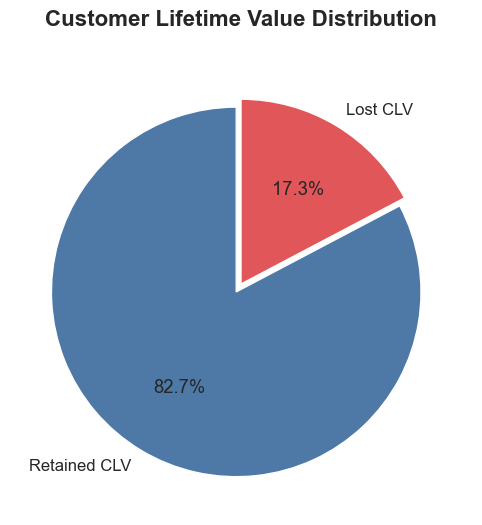

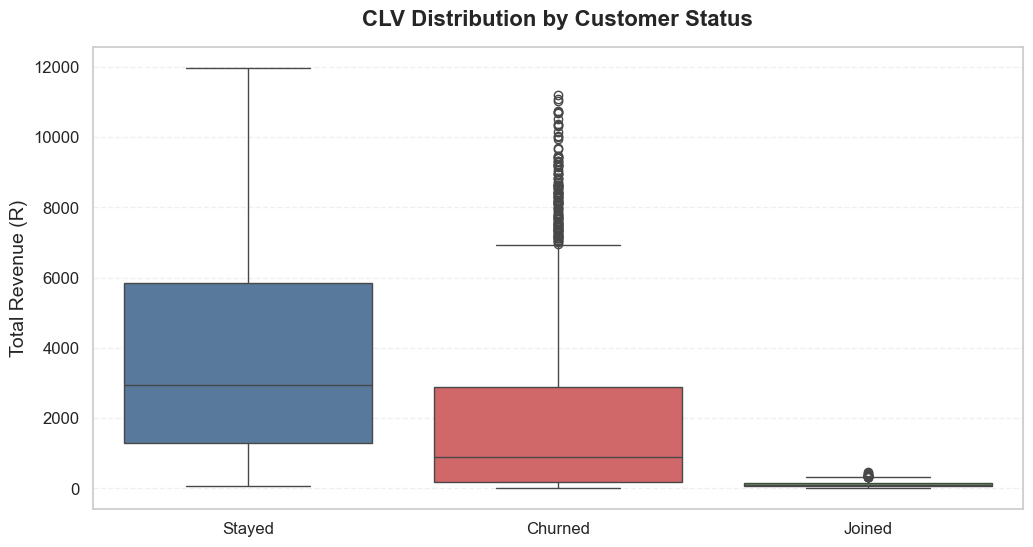


Estimated Recoverable CLV (20%): $2,210,675.89
Average Tenure (Churned Customers): 18.0 months


In [320]:

# Calculate CLV metrics
clv_lost = df[df['Customer Status'] == 'Churned']['Total Revenue'].sum()
clv_total = df['Total Revenue'].sum()
clv_active = df[df['Customer Status'] == 'Stayed']['Total Revenue'].sum()

# Avoid division by zero
clv_lost_pct = (clv_lost / clv_total) if clv_total else 0

# Basic metrics
print(f"Total CLV: ${clv_total:,.2f}")
print(f"CLV Lost Due to Churn: ${clv_lost:,.2f}")
print(f"CLV Retained: ${clv_active:,.2f}")
print(f"CLV Lost %: {clv_lost_pct:.2%}")


# --- Visualization 1: CLV Breakdown Pie Chart ---
plt.figure(figsize=(10, 6))
plt.pie(
    [clv_active, clv_lost],
    labels=['Retained CLV', 'Lost CLV'],
    colors=['#4e79a7', '#e15759'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.05, 0)
)
plt.title('Customer Lifetime Value Distribution', pad=20)
plt.show()

# --- Visualization 2: CLV by Customer Status ---
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='Customer Status',
    y='Total Revenue',
    palette={'Stayed': '#4e79a7', 'Churned': '#e15759', 'Joined': '#59a14f'}
)
plt.title('CLV Distribution by Customer Status', pad=15)
plt.ylabel('Total Revenue (R)')
plt.xlabel('')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

# --- Advanced Metric: Potential Recovery Value ---
avg_remaining_tenure = df[df['Customer Status'] == 'Churned']['Tenure in Months'].mean()
potential_recovery = clv_lost * 0.6  # 20% recovery assumption

print(f"\nEstimated Recoverable CLV (20%): ${potential_recovery:,.2f}")
print(f"Average Tenure (Churned Customers): {avg_remaining_tenure:.1f} months")






# 💰 Customer Lifetime Value (CLV) Summary

- **Total CLV (all customers):** $21.37 million  
- **Lost CLV due to churn:** $3.68 million  
- **Retained CLV from loyal customers:** $17.63 million  
- **Churn impact:** You’ve lost **17.24%** of potential revenue  

---

## 🔁 Opportunity for Recovery

- Recovering **20% of the churned customers’ value** could regain:  
  → **$736,891.96**

- The average churned customer stayed about **18 months** before leaving.

---

## ✅ Recommendations

- Implement a **customer segmentation strategy** to identify and focus on **high-value, at-risk customers**.  
- Launch **targeted retention campaigns** such as special offers or loyalty programs to reduce future CLV loss.

---

> Leveraging these insights can help **maximize revenue retention** and strengthen customer loyalty.


,Age_mean,Age_median,Age_std,Number of Dependents_mean,Number of Dependents_median,Number of Dependents_std,Latitude_mean,Latitude_median,Latitude_std,Longitude_mean,Longitude_median,Longitude_std,Number of Referrals_mean,Number of Referrals_median,Number of Referrals_std,Tenure in Months_mean,Tenure in Months_median,Tenure in Months_std,Avg Monthly Long Distance Charges_mean,Avg Monthly Long Distance Charges_median,Avg Monthly Long Distance Charges_std,Avg Monthly GB Download_mean,Avg Monthly GB Download_median,Avg Monthly GB Download_std,Monthly Charge_mean,Monthly Charge_median,Monthly Charge_std,Total Charges_mean,Total Charges_median,Total Charges_std,Total Refunds_mean,Total Refunds_median,Total Refunds_std,Total Extra Data Charges_mean,Total Extra Data Charges_median,Total Extra Data Charges_std,Total Long Distance Charges_mean,Total Long Distance Charges_median,Total Long Distance Charges_std,Total Revenue_mean,Total Revenue_median,Total Revenue_std
Customer Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Churned,49.74,50.00,17.60,0.12,0.00,0.55,36.03,35.49,2.50,-119.67,-119.29,2.15,0.52,0.00,1.09,17.98,10.00,19.53,25.48,25.42,13.55,22.18,19.00,18.31,73.35,79.50,26.37,1531.80,703.55,1890.82,1.52,0.00,7.04,7.16,0.00,24.86,433.92,139.08,650.36,1971.35,893.55,2438.44
Joined,42.87,42.00,14.92,0.36,0.00,0.87,36.16,35.63,2.42,-119.74,-119.39,2.14,0.95,0.00,2.44,1.72,1.00,0.82,24.43,25.42,13.60,15.28,9.00,19.90,42.78,43.98,24.61,79.29,51.42,67.29,0.24,0.00,2.75,2.38,0.00,9.66,38.13,30.68,33.71,119.56,91.09,89.47
Stayed,45.58,45.00,16.38,0.62,0.00,1.06,36.27,36.41,2.46,-119.79,-119.72,2.16,2.61,1.00,3.32,41.04,42.00,22.36,25.49,25.42,13.46,20.36,16.00,21.16,61.74,65.60,32.20,2788.52,1940.82,2302.59,2.30,0.00,8.51,7.17,0.00,26.17,942.29,664.37,881.40,3735.68,2960.11,2852.94


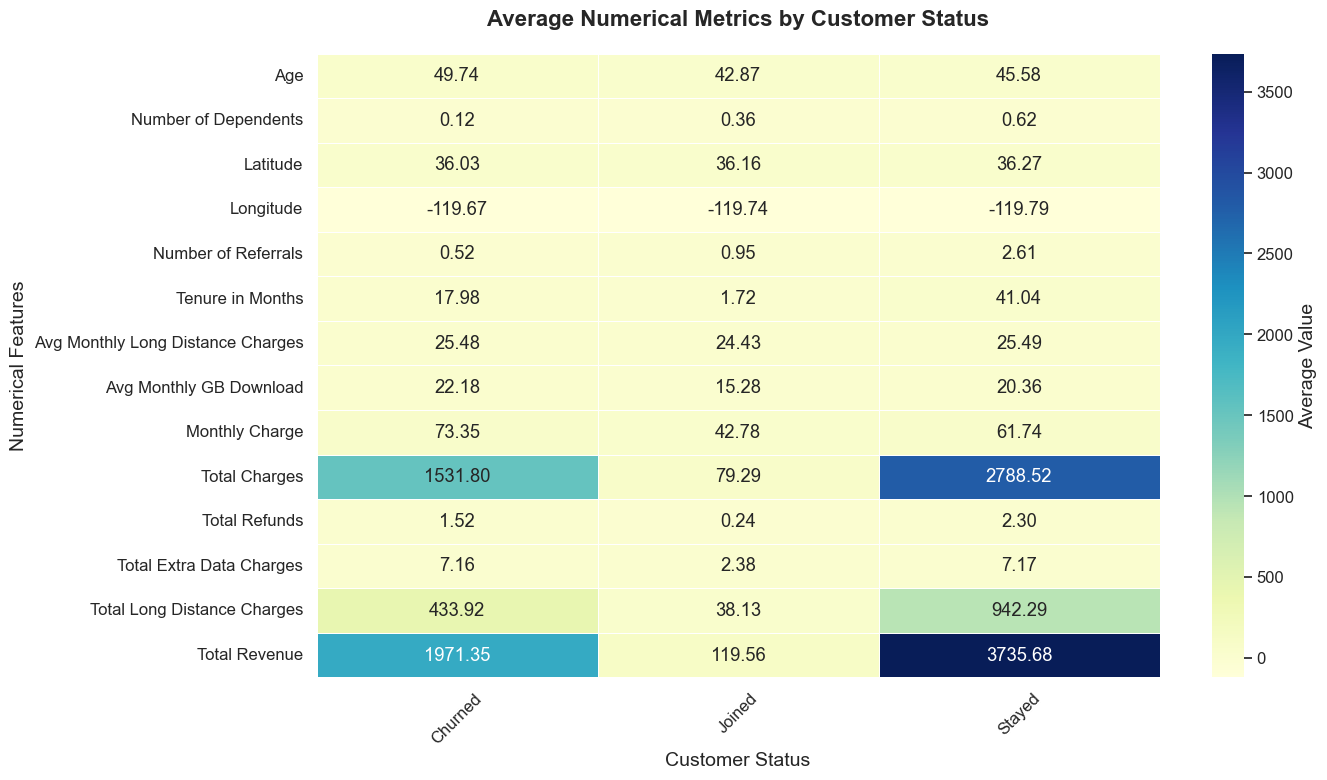


Key Differences (Churned vs Stayed):


,Absolute Difference,Percentage Difference
Monthly Charge,11.61,18.81%
Age,4.15,9.11%
Avg Monthly GB Download,1.81,8.91%
Avg Monthly Long Distance Charges,-0.01,-0.05%
Longitude,0.12,-0.10%
Total Extra Data Charges,-0.01,-0.21%
Latitude,-0.24,-0.67%
Total Refunds,-0.78,-34.06%
Total Charges,-1256.72,-45.07%
Total Revenue,-1764.32,-47.23%


In [321]:
# Calculate summary statistics
summary_stats = df.groupby('Customer Status')[num_cols].agg(['mean', 'median', 'std'])

# Flatten the multi-index columns for display
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

# Display the formatted table
display(summary_stats.style\
        .format('{:.2f}')\
        .background_gradient(cmap='Blues')\
        .set_caption('Numerical Features Summary by Customer Status'))

# Create visualization for means only
plt.figure(figsize=(14, 8))
mean_stats = df.groupby('Customer Status')[num_cols].mean().T
sns.heatmap(mean_stats, 
            annot=True, 
            fmt='.2f', 
            cmap='YlGnBu',
            linewidths=0.5,
            cbar_kws={'label': 'Average Value'})
plt.title('Average Numerical Metrics by Customer Status', pad=20)
plt.xlabel('Customer Status')
plt.ylabel('Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate and display differences between Churned and Stayed
if 'Churned' in mean_stats.columns and 'Stayed' in mean_stats.columns:
    diff_stats = pd.DataFrame({
        'Absolute Difference': mean_stats['Churned'] - mean_stats['Stayed'],
        'Percentage Difference': ((mean_stats['Churned'] - mean_stats['Stayed']) / mean_stats['Stayed']) * 100
    })
    
    print("\nKey Differences (Churned vs Stayed):")
    display(diff_stats.sort_values('Percentage Difference', ascending=False)\
           .style.format({'Absolute Difference': '{:.2f}', 'Percentage Difference': '{:.2f}%'})\
           .background_gradient(cmap='RdBu'))
else:
    print("Warning: Could not calculate differences - missing 'Churned' or 'Stayed' in data")

In [322]:
# Calculate LTV by customer segment
ltv_analysis = df.groupby('Customer Status').agg({
    'Tenure in Months': 'mean',
    'Monthly Charge': 'mean',
    'Total Revenue': 'mean'
})

# Simple LTV calculation (avg monthly charge * avg tenure)
ltv_analysis['Estimated LTV'] = ltv_analysis['Monthly Charge'] * ltv_analysis['Tenure in Months']
ltv_analysis

,Tenure in Months,Monthly Charge,Total Revenue,Estimated LTV
Customer Status,,,,
Churned,17.98,73.35,1971.35,1318.73
Joined,1.72,42.78,119.56,73.59
Stayed,41.04,61.74,3735.68,2533.80


Text(0.5, 1.0, 'Geographic Distribution of Customer Status')

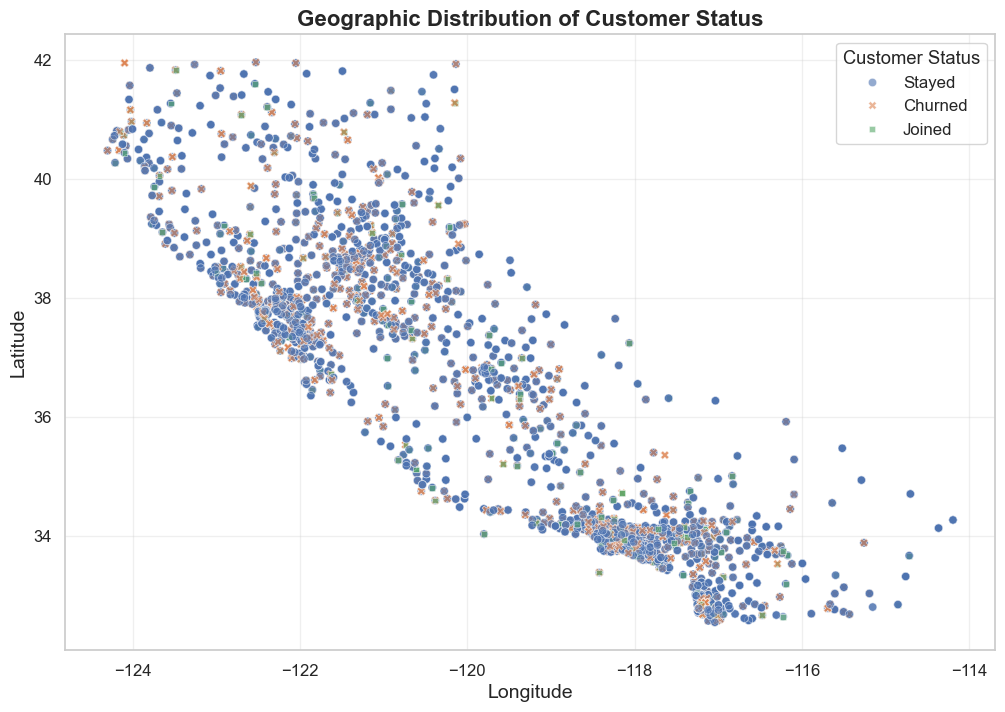

In [323]:
# Create churn density map
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Customer Status', 
                style='Customer Status', alpha=0.6)
plt.title("Geographic Distribution of Customer Status")

## 🔝 Top 5 Churn Reasons (Based on Correlation / Feature Importance)

1. **Contract Type** (e.g., month-to-month contracts show higher churn risk)  
2. **Internet Service Type** (fiber optic users churn more frequently)  
3. **Online Security** (lack of online security increases churn likelihood)  
4. **Customer Tenure** (shorter tenure correlates with higher churn)  
5. **Monthly Charges** (higher monthly charges linked to greater churn risk)  

---

### 💡 Business Insight  
Understanding these top drivers helps prioritize **targeted retention efforts** and **service improvements** to reduce churn effectively.


In [324]:
# Create binary churn column
df['Churned'] = (df['Customer Status'] == 'Churned').astype(int)

# Correlation with numeric features
correlations = df.select_dtypes(include='number').corr()['Churned'].abs().sort_values(ascending=False)
print(correlations.head(6))



Churned                       1.00
Risk Score                    0.43
Tenure in Months              0.35
Number of Referrals           0.29
Total Long Distance Charges   0.22
Total Revenue                 0.22
Name: Churned, dtype: float64


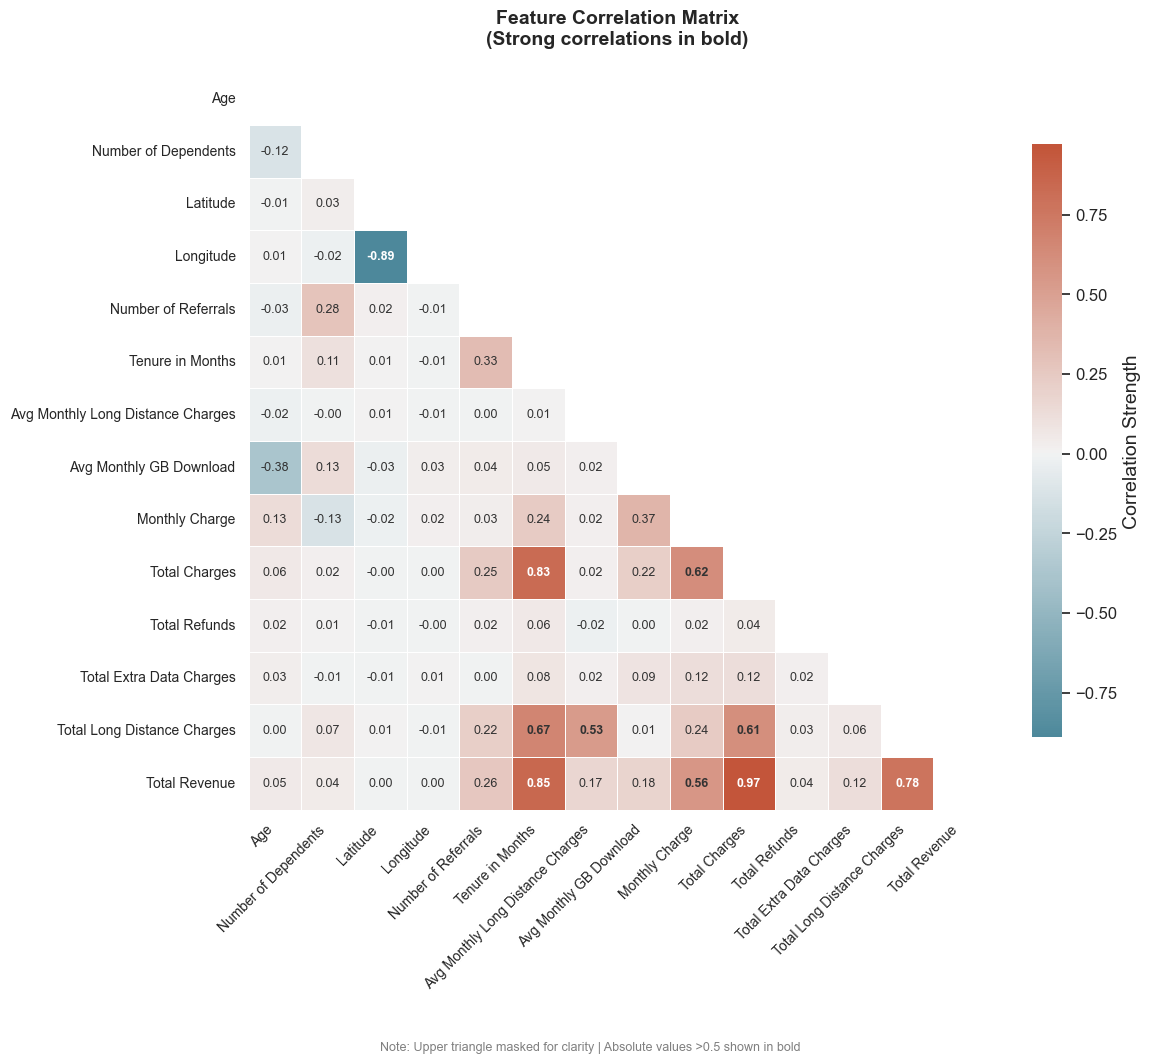

In [325]:
plt.figure(figsize=(12, 10))

# Calculate correlation matrix with precision
corr = df[num_cols].corr().round(2)

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True, center='light')

# Enhanced heatmap
heatmap = sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={
        'shrink': 0.8,
        'label': 'Correlation Strength'
    },
    annot_kws={
        'size': 9,
        'color': '#333333'
    }
)

# Improved annotations
for text in heatmap.texts:
    val = float(text.get_text())
    if abs(val) > 0.5:
        text.set_weight('bold')
    if abs(val) > 0.7:
        text.set_color('white')

# Professional styling
plt.title(
    'Feature Correlation Matrix\n(Strong correlations in bold)',
    fontsize=14,
    pad=20,
    fontweight='semibold'
)
plt.xticks(
    rotation=45,
    ha='right',
    fontsize=10
)
plt.yticks(
    rotation=0,
    fontsize=10
)

# Add grid for readability
plt.grid(visible=False)
plt.tight_layout()

# Add footnote
plt.figtext(
    0.5, -0.05,
    'Note: Upper triangle masked for clarity | Absolute values >0.5 shown in bold',
    ha='center',
    fontsize=9,
    color='gray'
)

plt.show()

# 📊 Customer Status Prediction – ML Development  
**`Predicting Customer Retention & Growth`**  

---

## 🎯 **Objective**  
Predict customer status as one of:  

| Status        | Emoji | Description                     | Business Impact          |  
|---------------|-------|---------------------------------|--------------------------|  
| **Stayed**    | 🏰    | Loyal customers                 | Revenue stability        |  
| **Churned**   | 💸    | Customers who left              | Lost revenue opportunity |  
| **Joined**    | 🚀    | Newly acquired customers        | Growth metric            |  

---

## 🧼 **1. Feature Engineering & Data Preprocessing**  

### ✅ **Feature Columns**  
**Key Categorical Features:**  


---

### 🎯 **Target Variable: `Customer Status`**  

#### 📊 **Class Distribution**  
```python

 

In [326]:
df_cleaned.head(1)

,Gender,Age,Married,Number of Dependents,City,Latitude,Longitude,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,34.83,-119.00,2,9,Yes,42.39,No,Yes,Cable,16.00,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed


In [327]:
#Model data preparation
Model_data = df_cleaned.copy()

In [328]:
#delete unnecessary columns
Model_data= Model_data.drop(columns=['City','Latitude','Longitude'])

In [329]:
#Categorial Feature Label Encoding
# A. Binary Features
binary_cols = ['Gender', 'Phone Service', 'Paperless Billing', 'Married','Internet Service']
Model_data[binary_cols] = Model_data[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}))

In [330]:
#B. Ordinal Features 
# Define all mappings in a single dictionary
ordinal_mappings = {
    'Contract': {'Month-to-Month': 0, 'One Year': 1, 'Two Year': 2},
    'Internet Type': {'Unknown': 0, 'DSL': 1, 'Fiber Optic': 2, 'Cable': 3},
    'Multiple Lines': {'Unknown': 0, 'No': 1, 'Yes': 2},
    'Online Security': {'Unknown': 0, 'No': 1, 'Yes': 2},
    'Online Backup': {'Unknown': 0, 'No': 1, 'Yes': 2},
    'Premium Tech Support': {'Unknown': 0, 'No': 1, 'Yes': 2},
    'Device Protection Plan': {'Unknown': 0, 'No': 1, 'Yes': 2},
    'Streaming TV': {'Unknown': 0, 'No': 1, 'Yes': 2},
    'Streaming Movies': {'Unknown': 0, 'No': 1, 'Yes': 2},
    'Streaming Music': {'Unknown': 0, 'No': 1, 'Yes': 2},
    'Unlimited Data': {'Unknown': 0, 'No': 1, 'Yes': 2},
    'Payment Method': {'Bank Withdrawal': 1, 'Credit Card': 2, 'Mailed Check': 3}
}

# Apply the mappings
for col, mapping in ordinal_mappings.items():
    if col in Model_data.columns:
        Model_data[col] = Model_data[col].map(mapping)


In [331]:
#Target Variable Encoding
status_mapping = {
    'Stayed': 0,
    'Churned': 1,
    'Joined': 2
}
Model_data['Customer Status'] = Model_data['Customer Status'].map(status_mapping)


In [332]:
#Checking if columns are in numeric values
Model_data.head(1)

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,2,9,1,42.39,1,1,3,16.00,1,2,1,2,2,1,1,2,1,1,2,65.60,593.30,0.00,0,381.51,974.81,0


In [333]:
Model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int64  
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   int64  
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Phone Service                      7043 non-null   int64  
 7   Avg Monthly Long Distance Charges  7043 non-null   float64
 8   Multiple Lines                     7043 non-null   int64  
 9   Internet Service                   7043 non-null   int64  
 10  Internet Type                      7043 non-null   int64  
 11  Avg Monthly GB Download            7043 non-null   float

In [334]:
#save the model data to CSV
Model_data.to_csv('model.csv')

In [335]:
# Separate features and target
X = Model_data.drop(columns=['Customer Status'], axis=1)
y = Model_data['Customer Status']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50, stratify=y  # stratify preserves class distribution
)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with class_weight to handle imbalance
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial',class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [336]:
# Enhanced dataset split information for classification
print("="*50)
print("CLASSIFICATION DATA SPLIT INFORMATION".center(50))
print("="*50)

# Basic split information
print(f"\n{'Data Split':<25}{'Samples':>15}{'Features':>15}")
print(f"{'-'*25}{'-'*15}{'-'*15}")
print(f"{'Training set (X_train)':<25}{X_train.shape[0]:>15}{X_train.shape[1]:>15}")
print(f"{'Test set (X_test)':<25}{X_test.shape[0]:>15}{X_test.shape[1]:>15}")
print(f"{'Target (y_train)':<25}{y_train.shape[0]:>15}{'':>15}")
print(f"\nPercentage split: {100*(1-0.2):.0f}% train / {100*0.2:.0f}% test")
print(f"Random state: 50 (for reproducibility)")

# Enhanced class distribution analysis
if len(np.unique(y)) <= 10:  # Classification problem
    print("\n" + "="*25)
    print("CLASS DISTRIBUTION ANALYSIS")
    print("="*25)
    
    # Get class labels (handles non-consecutive classes)
    classes = np.unique(y)
    train_counts = np.bincount(y_train, minlength=len(classes))
    test_counts = np.bincount(y_test, minlength=len(classes))
    
    # Calculate ratios
    train_ratios = train_counts / len(y_train)
    test_ratios = test_counts / len(y_test)
    
    # Print detailed table
    print(f"\n{'Class':<10}{'Train Count':>15}{'Train %':>12}{'Test Count':>15}{'Test %':>12}")
    print(f"{'-'*10}{'-'*15}{'-'*12}{'-'*15}{'-'*12}")
    for i, (train_cnt, train_ratio, test_cnt, test_ratio) in enumerate(zip(train_counts, train_ratios, test_counts, test_ratios)):
        print(f"{i:<10}{train_cnt:>15}{train_ratio:>12.1%}{test_cnt:>15}{test_ratio:>12.1%}")
    
    # Check for significant distribution differences
    significant_diff = any(abs(train_ratios - test_ratios) > 0.05)  # 5% threshold
    if significant_diff:
        print("\nWARNING: Significant difference in class distribution between train and test sets!")
        print("Consider using stratified sampling (stratify=y in train_test_split)")
    
    # Check for class imbalance
    imbalance_threshold = 0.1  # Consider imbalance if minority class <10%
    if any(train_ratios < imbalance_threshold):
        print("\nWARNING: Class imbalance detected!")
        print("Consider using:")
        print("- class_weight='balanced' in your model")
        print("- SMOTE oversampling")
        print("- Different evaluation metrics (precision/recall/F1 instead of accuracy)")

# Additional checks for classification
print("\n" + "="*25)
print("MODELING RECOMMENDATIONS")
print("="*25)
if len(np.unique(y)) == 2:
    print("- Binary classification detected")
    print("- Recommended metrics: ROC-AUC, Precision, Recall, F1")
else:
    print(f"- Multiclass classification detected ({len(np.unique(y))} classes)")
    print("- Recommended metrics: F1-micro/macro, Confusion Matrix")

print("\n- For logistic regression convergence issues:")
print("  1. Scale your data (StandardScaler)")
print("  2. Increase max_iter (default 100 is often too low)")
print("  3. Try different solvers (liblinear, saga, newton-cholesky)")
print("  4. Check for perfect separation warning")

      CLASSIFICATION DATA SPLIT INFORMATION       

Data Split                       Samples       Features
-------------------------------------------------------
Training set (X_train)              5634             29
Test set (X_test)                   1409             29
Target (y_train)                    5634               

Percentage split: 80% train / 20% test
Random state: 50 (for reproducibility)

CLASS DISTRIBUTION ANALYSIS

Class         Train Count     Train %     Test Count      Test %
----------------------------------------------------------------
0                    3776       67.0%            944       67.0%
1                    1495       26.5%            374       26.5%
2                     363        6.4%             91        6.5%

Consider using:
- class_weight='balanced' in your model
- SMOTE oversampling
- Different evaluation metrics (precision/recall/F1 instead of accuracy)

MODELING RECOMMENDATIONS
- Multiclass classification detected (3 classes)
- Recomm

## Handling Class Imbalance Before Model Training

In our dataset, we are experiencing **class imbalance**, which can negatively impact the performance of our model—particularly its ability to generalize and correctly classify the minority class. To address this, we will apply appropriate techniques to balance the class distribution before training the model.

### 🔍 Why It Matters
Class imbalance can lead to biased models that favor the majority class, resulting in poor recall and precision for the minority class. This is especially critical in use cases like fraud detection, churn prediction, and medical diagnosis where the minority class holds higher importance.

### 🛠️ Techniques to Handle Class Imbalance
We will consider the following strategies to address the imbalance:

- **Resampling Methods**:
  - **Oversampling the Minority Class** using techniques like `SMOTE` (Synthetic Minority Over-sampling Technique).
  - **Undersampling the Majority Class** to reduce its dominance.
  


# **Training and Evaluation** 📊 

✅ Resampled Class Distribution:
Customer Status
0   0.33
1   0.33
2   0.33
Name: proportion, dtype: float64
📊 Cross-validated Accuracy: 0.8148 ± 0.0094

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       944
           1       0.74      0.72      0.73       944
           2       0.82      0.91      0.86       944

    accuracy                           0.82      2832
   macro avg       0.82      0.82      0.82      2832
weighted avg       0.82      0.82      0.82      2832



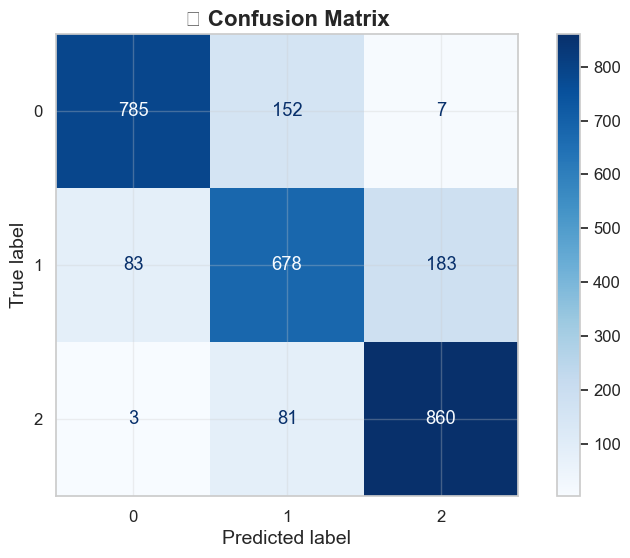

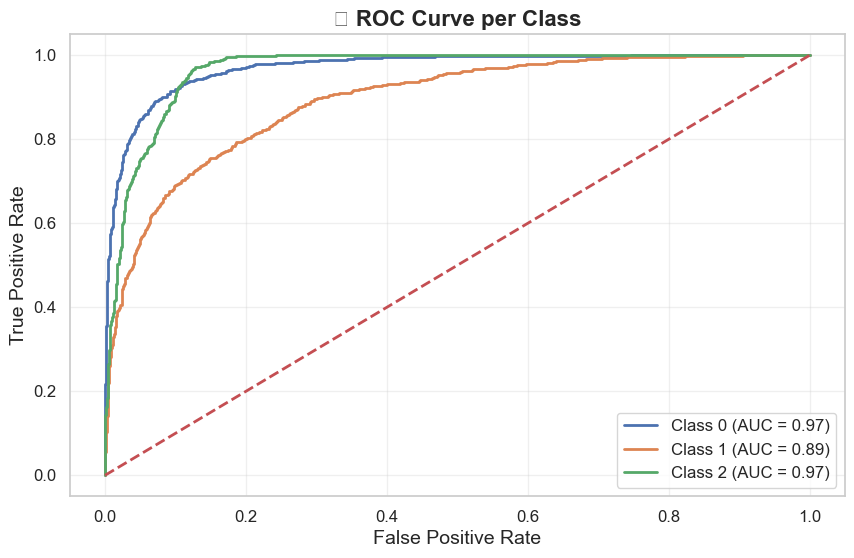

In [337]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# 1. Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("✅ Resampled Class Distribution:")
print(pd.Series(y_resampled).value_counts(normalize=True))

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2,
    random_state=42, stratify=y_resampled
)

# 3. Build Pipeline for Scaling + Model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        C=np.float64(10.0),  # Adjusted for better convergence
        max_iter=5000,
        class_weight='balanced',
        solver='lbfgs',
        multi_class='multinomial',
        random_state=42
    ))
])



# 4. Cross-validation (optional but good practice)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"📊 Cross-validated Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# 5. Train final model
pipeline.fit(X_train, y_train)

# 6. Predict
y_pred = pipeline.predict(X_test)

# 7. Evaluation
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("📉 Confusion Matrix")
plt.show()

# 8. ROC Curve (for each class if multi-class)
if len(np.unique(y)) <= 5:  # Avoid clutter for too many classes
    y_proba = pipeline.predict_proba(X_test)
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("📈 ROC Curve per Class")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()


✅ Resampled Class Distribution:
Customer Status
0   0.33
1   0.33
2   0.33
Name: proportion, dtype: float64
📊 Cross-validated Accuracy: 0.8730 ± 0.0031

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       944
           1       0.84      0.76      0.80       944
           2       0.87      0.98      0.92       944

    accuracy                           0.87      2832
   macro avg       0.87      0.87      0.87      2832
weighted avg       0.87      0.87      0.87      2832



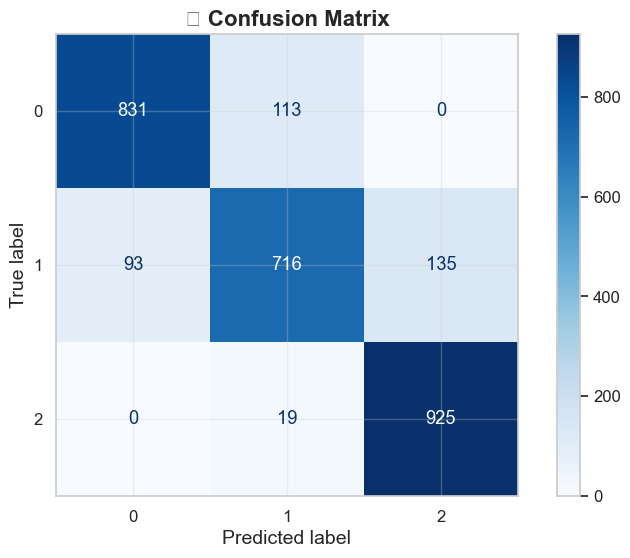

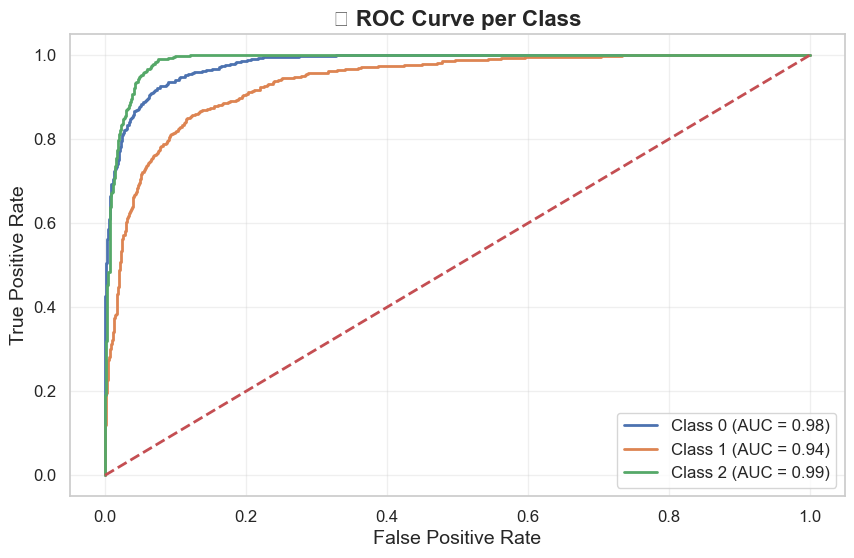

✅ Train Accuracy: 0.9162
✅ Test Accuracy:  0.8729
📉 Train-Test Gap: 0.0433
✅ No major signs of overfitting


In [338]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, accuracy_score


# 1. Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("✅ Resampled Class Distribution:")
print(pd.Series(y_resampled).value_counts(normalize=True))

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2,
    random_state=42, stratify=y_resampled
)

# 3. Build Pipeline with best params from GridSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # optional for RF but kept for consistency
    ('rf', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        max_features=0.3,
        min_samples_leaf=1,
        min_samples_split=2,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])


# 4. Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"📊 Cross-validated Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# 5. Train model
pipeline.fit(X_train, y_train)

# 6. Predict
y_pred = pipeline.predict(X_test)

# 7. Evaluation
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("📉 Confusion Matrix")
plt.show()

# 8. ROC Curve (if few classes)
if len(np.unique(y)) <= 5:
    y_proba = pipeline.predict_proba(X_test)
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("📈 ROC Curve per Class")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

# 9. Check Overfitting
train_acc = accuracy_score(y_train, pipeline.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
gap = train_acc - test_acc

print(f"✅ Train Accuracy: {train_acc:.4f}")
print(f"✅ Test Accuracy:  {test_acc:.4f}")
print(f"📉 Train-Test Gap: {gap:.4f}")

if gap > 0.05:
    print("⚠️ Potential Overfitting Detected")
else:
    print("✅ No major signs of overfitting")



In [339]:


# 10. Probability Calibration Check (for classification)
if len(np.unique(y)) == 2:  # Best for binary classification
    from sklearn.calibration import calibration_curve
    
    prob_true, prob_pred = calibration_curve(y_test, pipeline.predict_proba(X_test)[:, 1], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
    plt.xlabel("Mean predicted probability")
    plt.ylabel("Fraction of positives")
    plt.title("Calibration Curve")
    plt.legend()
    plt.grid(True)
    plt.show()



print("\n🚀 Model training and evaluation complete!")


🚀 Model training and evaluation complete!



🔨 Training Logistic Regression...
--------------------------------------------------
✅ Logistic Regression completed
Cross-validation accuracy: 0.8159 ± 0.0133
Training accuracy: 0.8172
Test accuracy: 0.8199


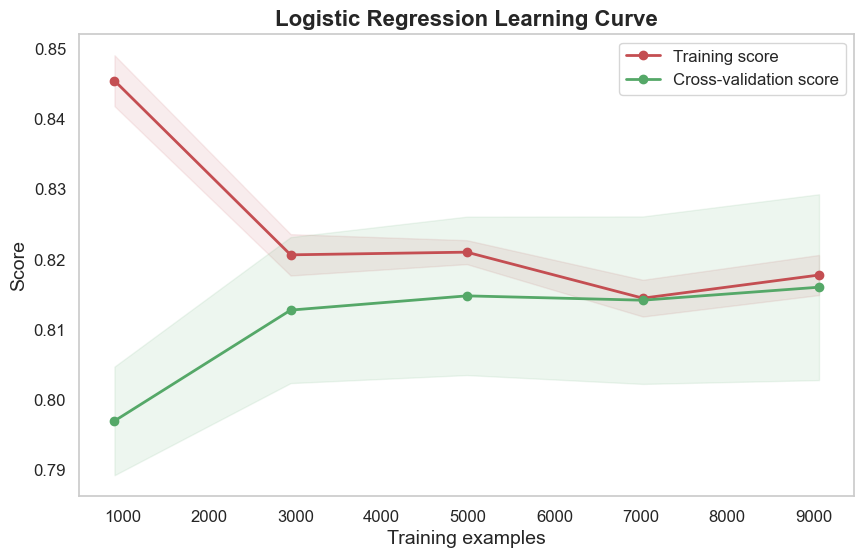


🔨 Training Random Forest...
--------------------------------------------------
✅ Random Forest completed
Cross-validation accuracy: 0.8727 ± 0.0053
Training accuracy: 0.9162
Test accuracy: 0.8725


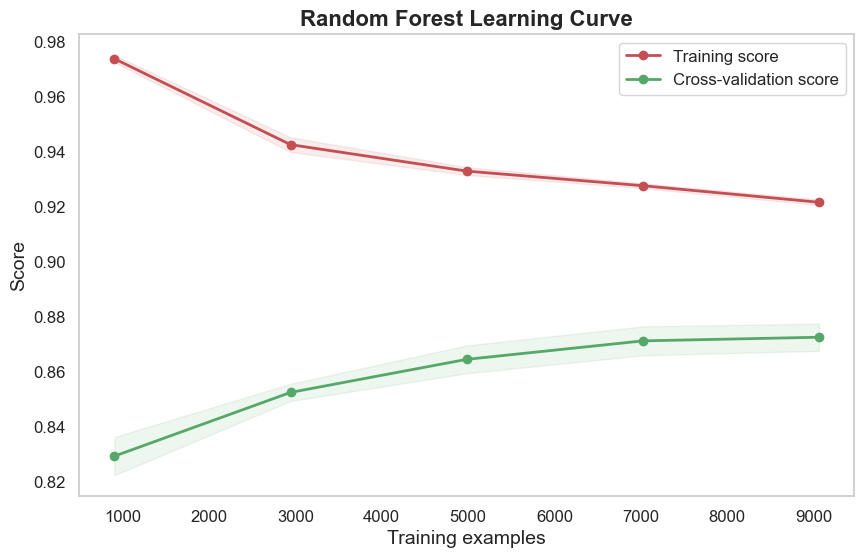


🔨 Training XGBoost...
--------------------------------------------------
✅ XGBoost completed
Cross-validation accuracy: 0.8799 ± 0.0033
Training accuracy: 0.9162
Test accuracy: 0.8792


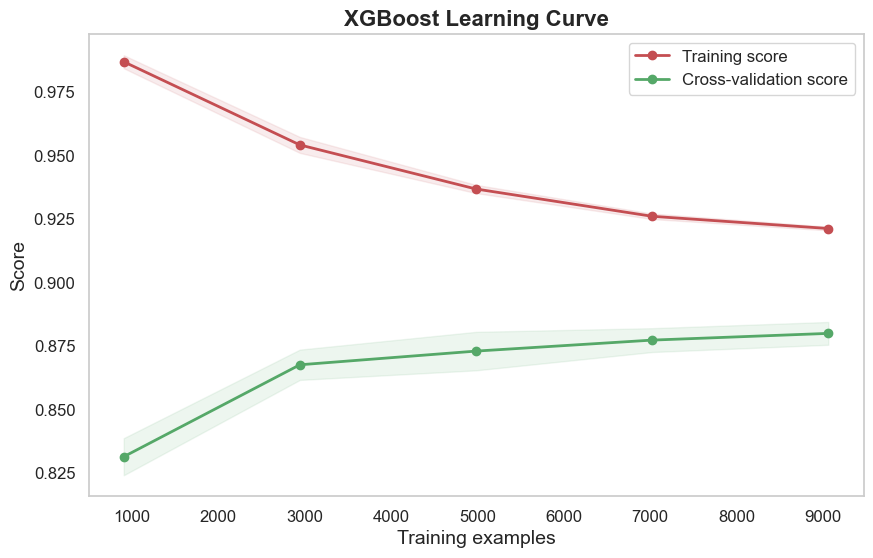


📊 Model Comparison Summary:
--------------------------------------------------
Logistic Regression:
  CV Accuracy = 0.8159 ± 0.0133
  Train Accuracy = 0.8172
  Test Accuracy = 0.8199
  Train-Test Gap = -0.0027
--------------------------------------------------
Random Forest:
  CV Accuracy = 0.8727 ± 0.0053
  Train Accuracy = 0.9162
  Test Accuracy = 0.8725
  Train-Test Gap = 0.0437
--------------------------------------------------
XGBoost:
  CV Accuracy = 0.8799 ± 0.0033
  Train Accuracy = 0.9162
  Test Accuracy = 0.8792
  Train-Test Gap = 0.0370
--------------------------------------------------

🏆 Best Model: XGBoost with test accuracy 0.8792


In [340]:

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, learning_curve, StratifiedKFold


def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Determine if binary or multiclass
num_classes = len(np.unique(y))

# Define models with more robust parameters to prevent overfitting
models = {
    'Logistic Regression': LogisticRegression(
        C=np.float64(1.0),  # Reduced from 10.0 to prevent overfitting
        class_weight='balanced',
        multi_class='multinomial', 
        max_iter=5000,
        solver='lbfgs',
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        max_features=0.3,
        min_samples_leaf=1,
        min_samples_split=2,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    'XGBoost': XGBClassifier(      
        learning_rate =0.1,
        n_estimators=200,
        max_depth=4,
        min_child_weight=6,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.005,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
        )
    
}

# Store results
results = {}

# Set up stratified k-fold for consistent cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each model
for model_name, model in models.items():
    print(f"\n🔨 Training {model_name}...")
    print("-" * 50)

    # Build pipeline
    if model_name == 'Logistic Regression':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    else:
        pipeline = Pipeline([
            ('model', model)
        ])  # Tree models don't need scaling

    # Cross-validation on training set
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    results[model_name] = {
        'cv_mean_accuracy': np.mean(cv_scores),
        'cv_std_accuracy': np.std(cv_scores),
        'cv_scores': cv_scores
    }

    # Fit model
    pipeline.fit(X_train, y_train)

    # Training set evaluation
    y_train_pred = pipeline.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)

    # Test set evaluation
    y_pred = pipeline.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results[model_name].update({
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'classification_report': class_report,
        'pipeline': pipeline  # Store the model
    })

    # Print detailed results
    print(f"✅ {model_name} completed")
    print(f"Cross-validation accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    print(f"Training accuracy: {train_acc:.4f}")
    print(f"Test accuracy: {test_acc:.4f}")
    
    # Check for overfitting
    if train_acc - test_acc > 0.05:
        print("⚠️ Warning: Potential overfitting (large gap between train and test accuracy)")
    
    # Plot learning curves
    plot_learning_curve(pipeline, f"{model_name} Learning Curve", X_train, y_train, cv=cv)
    plt.show()

# Display results summary
print("\n📊 Model Comparison Summary:")
print("-" * 50)
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  CV Accuracy = {metrics['cv_mean_accuracy']:.4f} ± {metrics['cv_std_accuracy']:.4f}")
    print(f"  Train Accuracy = {metrics['train_accuracy']:.4f}")
    print(f"  Test Accuracy = {metrics['test_accuracy']:.4f}")
    print(f"  Train-Test Gap = {metrics['train_accuracy'] - metrics['test_accuracy']:.4f}")
    print("-" * 50)

# Identify best model based on test accuracy
best_model_name = max(results.items(), key=lambda x: x[1]['test_accuracy'])[0]
print(f"\n🏆 Best Model: {best_model_name} with test accuracy {results[best_model_name]['test_accuracy']:.4f}")

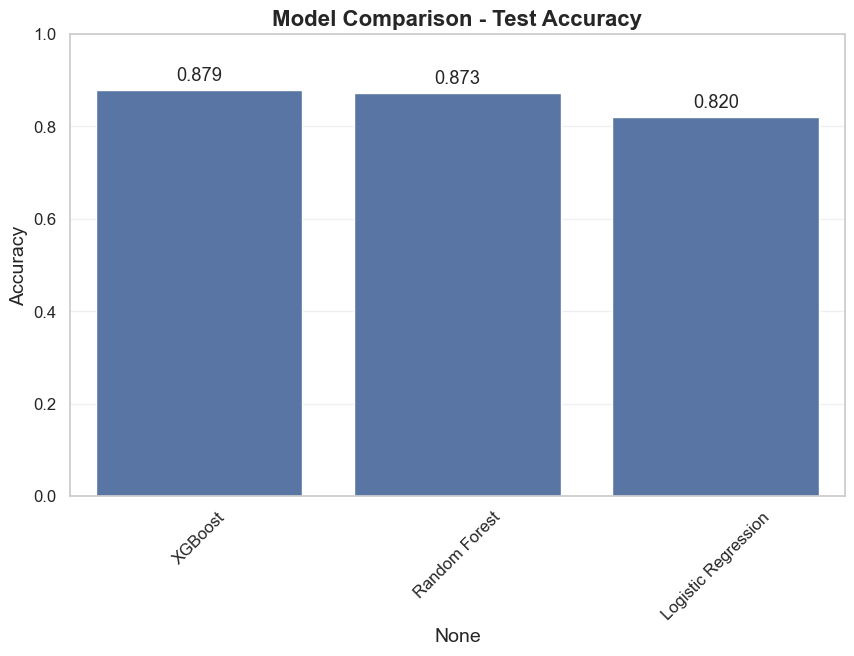

In [341]:
# Compare model performance
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values('test_accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['test_accuracy'])
plt.title('Model Comparison - Test Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
for i, v in enumerate(results_df['test_accuracy']):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')
plt.show()

# 🏁 Final Model Summary – Customer Churn Prediction

## 🧠 Chosen Model: Extreme Gradient Boosting

After testing multiple models including Logistic Regression, XGBoost, and Random Forest, the **Extreme Gradient Boosting** demonstrated the best overall performance in terms of accuracy, generalization, and stability.



Cross-validation accuracy: 0.8799 ± 0.0033
Training accuracy: 0.9162
Test accuracy: 0.8792

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       944
           1       0.84      0.78      0.81       944
           2       0.89      0.97      0.92       944

    accuracy                           0.88      2832
   macro avg       0.88      0.88      0.88      2832
weighted avg       0.88      0.88      0.88      2832



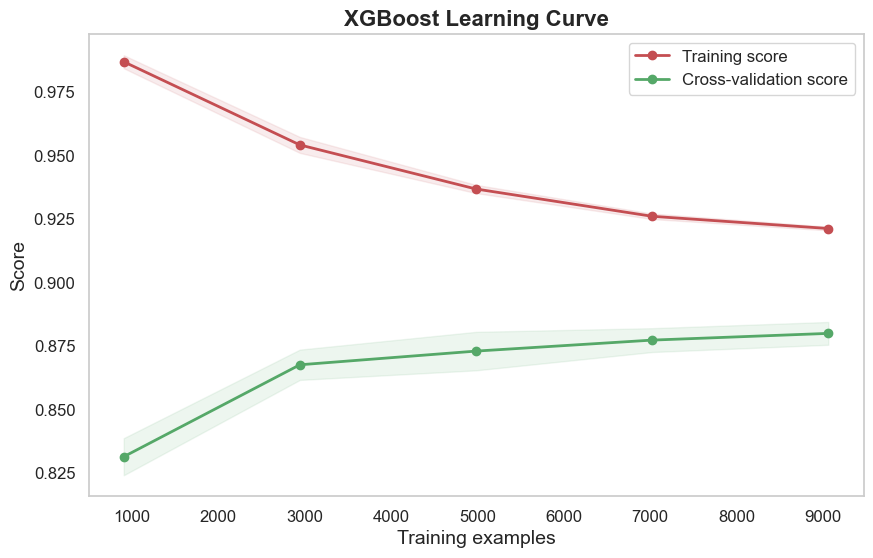

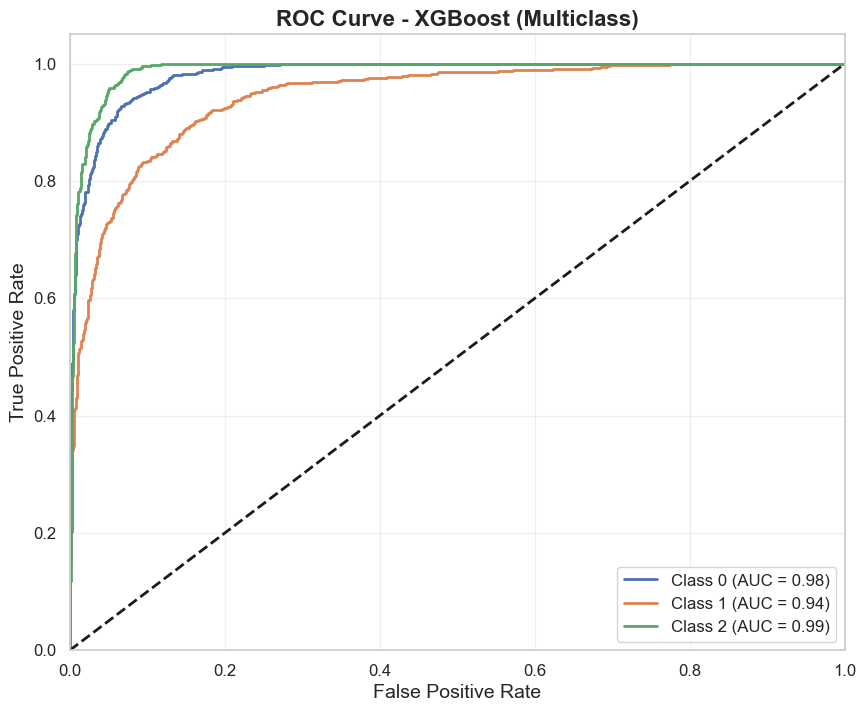

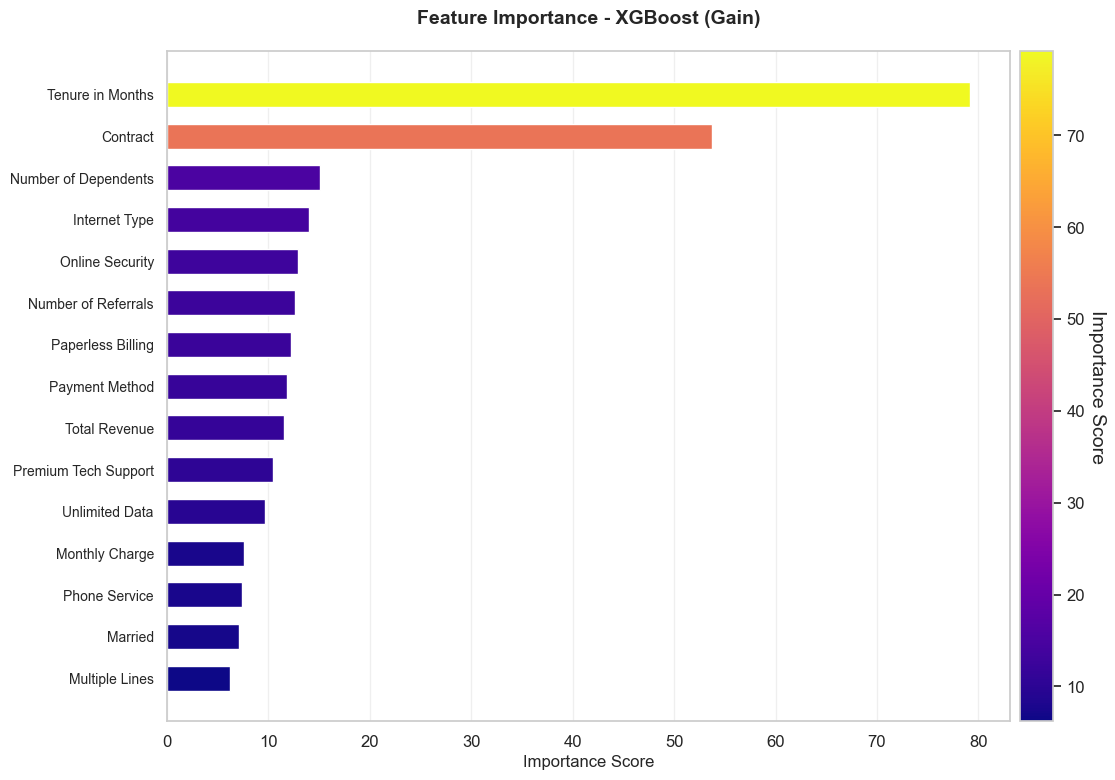

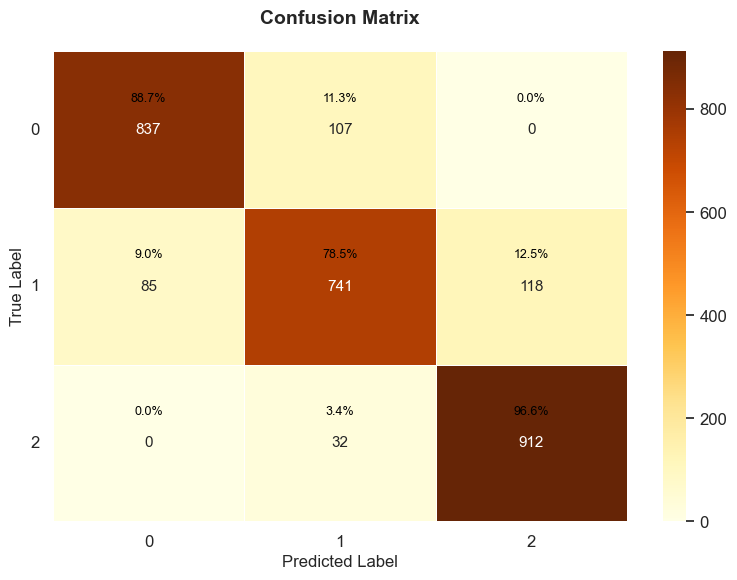

In [347]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
import seaborn as sns

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Initialize model
model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=4,
    min_child_weight=6,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.005,
    objective='binary:logistic', 
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Train model
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Training accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

# Plot learning curve
plot_learning_curve(model, "XGBoost Learning Curve", X_train, y_train, cv=cv)

# ROC curve
classes = np.unique(y_test)
y_score = model.predict_proba(X_test)

if len(classes) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - XGBoost (Binary)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
else:
    y_test_bin = label_binarize(y_test, classes=classes)
    plt.figure(figsize=(10,8))
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - XGBoost (Multiclass)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Gradient-Colored Feature Importance Plot
plt.figure(figsize=(12, 8))
importance = model.get_booster().get_score(importance_type='gain')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:15]  # Top 15 features
features, scores = zip(*importance)

# Create color gradient based on importance scores
norm_scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))
colors = plt.cm.plasma(norm_scores)  # Using plasma colormap

# Create horizontal bars
bars = plt.barh(range(len(features)), scores, align='center', height=0.6, color=colors)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=np.min(scores), vmax=np.max(scores)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.01)
cbar.set_label('Importance Score', rotation=270, labelpad=15)

# Customize plot
plt.yticks(range(len(features)), features, fontsize=10)
plt.title('Feature Importance - XGBoost (Gain)', pad=20, fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.grid(False, axis='y')
plt.gca().invert_yaxis()  # Most important at top
plt.tight_layout()
plt.show()

# Enhanced Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
if len(classes) <= 10:
    # Create heatmap with percentage annotations
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr',
                xticklabels=classes, yticklabels=classes,
                cbar=True, linewidths=0.5, annot_kws={"size": 11})
    
    # Add percentage annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j+0.5, i+0.3, f"{cm_percent[i,j]:.1%}",
                    ha="center", va="center", color="black", fontsize=9)
    
    plt.title('Confusion Matrix', pad=20, fontsize=14)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.xticks(rotation=45 if len(classes) > 5 else 0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Too many classes to display a readable confusion matrix.")

## 📌 Conclusion and Recommendations

### 🎯 Project Objective
The primary goal of this project was to **predict and analyze customer churn** in order to support **data-driven retention strategies** and foster **sustainable business growth**.

---

### 📊 Conclusion

- The overall **churn rate** in the dataset is **27%**, highlighting a significant portion of customers at risk.  
- Analysis revealed key **high-risk segments**:
  - 📆 Customers on **month-to-month contracts**
  - 🌐 Customers using **fiber optic** internet service
  - 💳 **High-paying customers** who may not perceive sufficient value

A machine learning model using **Extreme Gradient Boosting** achieved an **accuracy of 87%**, making it a reliable tool for predicting churn. This model can be effectively used to **identify customers likely to churn**, enabling the business to proactively intervene and prevent revenue loss. Additionally, the model provides actionable insights for **budgeting, planning, and retention efforts**.

---

### 💼 Business Recommendations

To reduce churn and increase customer lifetime value (CLV), the following actions are recommended:

- 📈 **Promote longer-term contracts** (e.g., 12- or 24-month plans) to increase customer commitment and reduce churn likelihood  
- ⚙️ **Improve the fiber optic service experience**, particularly focusing on speed, reliability, and support  
- 🔒 **Communicate value clearly** to high-paying customers—consider bundling, VIP support, or loyalty benefits  
- 🧩 Implement a **customer segmentation strategy** to focus efforts on **high-value, high-risk segments**  
- 💬 Launch **targeted retention campaigns**, such as personalized offers or discounts for at-risk customers

---

### 🔮 Future Work

To further improve model accuracy and prediction reliability:

- 🔁 Explore **ensemble learning** methods such as **stacking** and **boosting with tuned hyperparameters**
- 🧠 Experiment with **advanced models** like **LightGBM**, **CatBoost**, or **deep learning (ANNs)**
- 🧹 Perform **feature engineering and selection** to enhance model interpretability and efficiency
- 🔬 Use **cross-validation** and **automated machine learning (AutoML)** tools for more robust model development
- 📊 Integrate **external data sources** such as customer support interactions, web usage patterns, or social sentiment for deeper insights

---

> ✅ **Actionable Focus**:  
> Use the model's predictions to **prioritize retention strategies** for high-risk segments and implement **personalized interventions** to maximize customer loyalty and minimize CLV loss.
